<h1 style='text-align: center;'> Project: Investigate The State Of The World </h1>

<img src='world_pic.jpg' style="width:400px;height:400px">

## Table of Contents

1. [Introduction](#1.-Introduction)     
    1.1[Dataset Description](#1.1-Dataset-Description)       
    1.2[Questions For Analysis](#1.2-Questions-For-Analysis)
2. [Data Wrangling](#2.-Data-Wrangling)    
    2.1[Data Cleaning](#2.1-Data-Cleaning)                 
3. [Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)    
    3.1[Research Question 1: What Are The Top Twenty Leading Countries Across Key Metrics Indicators in Recent Years?](#3.1-Research-Question-1:-What-are-the-top-twenty-leading-countries-across-key-metrics-indicators-in-recent-years?)       
    3.2[Research Question 2: What does the world choropleth map look like for key metrics indicators in recent years?](#3.2-Research-Question-2:-What-does-the-world-choropleth-map-look-like-for-key-metrics-indicators-in-recent-years?)      
    3.3[Research Question 3: Are There Any Relations Between Indicators?](#3.3-Research-Question-3:-Are-there-any-relations-between-indicators?)    
    3.4[Research Question 4: What Are The leading Countries For a Change From Two Decades Ago?](#3.4-Research-Question-4:-What-are-the-leading-countries-for-a-change-from-two-decades-ago?)   
    3.5[Research Question 5: What Are The Characteristics Of a Great Country Across Different Indicators?](#3.5-Research-Question-5:-What-are-the-characteristics-of-a-great-country-across-different-indicators?)  
    3.6[Research Question 6: What Is The Status Of Egypt From Two Decades Ago Till Now?](#3.6-Research-Question-6:-What-is-the-status-of-Egypt-from-two-decades-ago-till-now?)  
4. [Conclusions](#4.-Conclusions)           
    4.1 [The Top Five Leading Countries](#4.1-The-Top-Five-Leading-Countries-in:)        
    4.2 [The Relations Between Indicators](#4.2-The-Relations-Between-Indicators:)      
    4.3 [The Top Five Leading Countries In Making a Significant Improvement](#4.3-The-Top-Five-Leading-Countries-In-Making-a-Significant-Improvement:)      
    4.4 [The Characteristics Of Great Countries](#4.4-The-Characteristics-Of-Great-Countries:)      
    4.5 [The Status Of Egypt](#4.5-The-Status-Of-Egypt:)      
    4.6 [Finally](#4.6-Finally)      
    
    




## 1. Introduction

### 1.1 Dataset Description 

**Gapminder World Data** which collected a lot of information about how people live their lives in different countries, tracked across the years, and on a number of different indicators.

**I select 9 key metrics to understand the state of the world and the global development:**

> **(1) Hunger and Undernourishment**

> **(2) Child Mortality**

> **(3) Education**

> **(4) GDP per capita**

> **(5) Extreme Poverty**

> **(6) Population**

> **(7) Fertility Rate**

> **(8) Energy Use**

> **(9) CO2 emissions**

_**Below are the description of each dataset gathered from Gapminder**_

### Data Gathered from Gapminder *[Indicators]*:
>(1) **`sn_itk_defc_zs.csv`**: Prevalence of undernourishment (% of population).

>(2) **`child_mortality_0_5_year_olds_dying_per_1000_born.csv`**: Death of children under five years of age per 1000 live births

>(3) **`literacy_rate_adult_total_percent_of_people_ages_15_and_above.csv`**: Adult literacy rate is the percentage of people ages 15 and above who can, with understanding, read and write a short, simple statement on their every day life.

>(4) **`income_per_person_gdppercapita_ppp_inflation_adjusted.csv`**: Gross Domestic Product per person adjusted for differences in purchasing power (in international dollars, fixed 2017 prices, PPP based on 2017 ICP).

>(5) **`poverty_percent_people_below_320_a_day.csv`**: poverty headcount ratio at 3.20 dollar a day at 2011 international prices. As a result of revisions in PPP exchange rates, poverty rates for individual countries cannot be compared with poverty rates reported in earlier editions.

>(6) **`population_total.csv`**: Total Population.

>(7) **`sp_dyn_tfrt_in.csv`**: Fertility rate, total (births per woman).

>(8) **`energy_use_per_person.csv`**: Refers to use of primary energy before transformation to other end-use fuels, which is equal to indigenous production plus imports and stock changes, minus exports and fuels supplied to ships and aircraft engaged in international transport (Kg Of Oil Equivalent Per Person).

>(9) **`co2_emissions_tonnes_per_person.csv`**: Carbon dioxide emissions from burning of fossil fuels (metric tonnes of CO2 per person).

### 1.2 Questions For Analysis

###  Q1: What are the top twenty leading countries across key metrics indicators in recent years?

### Q2: Are there any relations between indicators?

### Q3: What are the leading countries for a change from two decades ago?

### Q4: What are the characteristics of a great country across different indicators?

### Q5: What is the status of Egypt from two decades ago till now?

In [1]:
# All the packages that I will use in the investigation 
import pandas as pd
import numpy as np
import pycountry     # Gets countries code 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
%matplotlib inline

## 2. Data Wrangling

**Reading all the data set**

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df_child_mortality = pd.read_csv('child_mortality_0_5_year_olds_dying_per_1000_born.csv')
df_co2 = pd.read_csv('co2_emissions_tonnes_per_person.csv')
df_energy_use = pd.read_csv('energy_use_per_person.csv')
df_gdp = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
df_literacy = pd.read_csv('literacy_rate_adult_total_percent_of_people_ages_15_and_above.csv')
df_population = pd.read_csv('population_total.csv')
df_poverty = pd.read_csv('poverty_percent_people_below_320_a_day.csv')
df_fertility = pd.read_csv('sp_dyn_tfrt_in.csv')
df_undernourishment = pd.read_csv('sn_itk_defc_zs.csv')

**(1) [Hunger and Undernourishment] indicator dataset Reshaping process:** 

In [3]:
df_undernourishment.head()

country  2001  2002  2003  2004  2005  2006  2007  2008  2009  \
0           Afghanistan  47.8  45.6  40.6  38.0  36.1  33.3  29.8  26.5  24.4   
1                Angola  67.5  63.2  58.7  55.1  52.2  49.3  46.1  42.9  33.2   
2               Albania   4.9   6.1   7.5   8.6   8.9   8.8   8.3   7.3   5.9   
3  United Arab Emirates   3.3   4.4   5.9   7.7   8.8   9.2   9.0   8.2   7.4   
4             Argentina   3.0   3.8   4.5   4.0   3.7   3.4   3.3   3.3   3.3   

   2010  2011  2012  2013  2014  2015  2016  2017  2018  2019  
0  23.7  24.7  28.2  26.3  24.2  21.5  22.2  23.0  23.4  25.6  
1  24.4  17.2  16.3  15.0  14.2  14.5  15.4  15.4  15.5  17.3  
2   4.9   4.1   3.5   3.9   4.4   4.7   4.3   4.1   4.0   3.9  
3   6.3   5.5   4.4   3.6   2.9   2.7   2.9   3.2   3.4   3.7  
4   3.4   3.3   3.1   2.8   2.5   2.5   2.6   3.1   3.5   3.9

In [4]:
# reshaping the years row to column
df_undernourishment = df_undernourishment.melt(id_vars=['country'], value_vars=df_undernourishment.columns[1:])
df_undernourishment.head()

country variable  value
0           Afghanistan     2001   47.8
1                Angola     2001   67.5
2               Albania     2001    4.9
3  United Arab Emirates     2001    3.3
4             Argentina     2001    3.0

In [5]:
# renaming the columns name to appropriate name
df_undernourishment.rename(columns = {'variable' : 'year', 'value' : 'undernourishment_rate'}, inplace=True)
df_undernourishment.head()

country  year  undernourishment_rate
0           Afghanistan  2001                   47.8
1                Angola  2001                   67.5
2               Albania  2001                    4.9
3  United Arab Emirates  2001                    3.3
4             Argentina  2001                    3.0

>**Repeating the process for all the other datasets indicators**

**(2) [Child Mortality] indicator dataset Reshaping process:** 

In [6]:
# reshaping the years row to column
df_child_mortality = df_child_mortality.melt(id_vars=['country'], value_vars=df_child_mortality.columns[1:])

# renaming the columns name to appropriate name
df_child_mortality.rename(columns = {'variable' : 'year', 'value' : 'child_death/1k'}, inplace=True)
df_child_mortality.head()

country  year  child_death/1k
0           Afghanistan  1800           469.0
1                Angola  1800           486.0
2               Albania  1800           375.0
3               Andorra  1800             NaN
4  United Arab Emirates  1800           434.0

**(3) [Education] indicator dataset Reshaping process:** 

In [7]:
# reshaping the years row to column
df_literacy = df_literacy.melt(id_vars=['country'], value_vars=df_literacy.columns[1:])

# renaming the columns name to appropriate name
df_literacy.rename(columns = {'variable' : 'year', 'value' : 'adult_literacy_rate'}, inplace=True)
df_literacy.head()

country  year  adult_literacy_rate
0        Aruba  1975                  NaN
1  Afghanistan  1975                  NaN
2       Angola  1975                  NaN
3     Anguilla  1975                  NaN
4      Albania  1975                  NaN

**(4) [GDP per capita] indicator dataset Reshaping process:** 

In [8]:
# reshaping the years row to column
df_gdp = df_gdp.melt(id_vars=['country'], value_vars=df_gdp.columns[1:])

# renaming the columns name to appropriate name
df_gdp.rename(columns = {'variable' : 'year', 'value' : 'gdp/person'}, inplace=True)
df_gdp.head()

country  year gdp/person
0           Afghanistan  1800        683
1                Angola  1800        700
2               Albania  1800        755
3               Andorra  1800       1360
4  United Arab Emirates  1800       1130

**(5) [Extreme Poverty] indicator dataset Reshaping process:** 

In [9]:
# reshaping the years row to column
df_poverty = df_poverty.melt(id_vars=['country'], value_vars=df_poverty.columns[1:])

# renaming the columns name to appropriate name
df_poverty.rename(columns = {'variable' : 'year', 'value' : 'poverty_ratio'}, inplace=True)
df_poverty.head()

country  year  poverty_ratio
0                Angola  1967            NaN
1               Albania  1967            NaN
2  United Arab Emirates  1967            NaN
3             Argentina  1967            NaN
4               Armenia  1967            NaN

**(6) [Population] indicator dataset Reshaping process:** 

In [10]:
# reshaping the years row to column
df_population = df_population.melt(id_vars=['country'], value_vars=df_population.columns[1:])

# renaming the columns name to appropriate name
df_population.rename(columns = {'variable' : 'year', 'value' : 'total_population'}, inplace=True)
df_population.head()

country  year total_population
0           Afghanistan  1800            3.28M
1                Angola  1800            1.57M
2               Albania  1800             400k
3               Andorra  1800             2650
4  United Arab Emirates  1800            40.2k

**(7) [Fertility Rate] indicator dataset Reshaping process:** 

In [11]:
# reshaping the years row to column
df_fertility = df_fertility.melt(id_vars=['country'], value_vars=df_fertility.columns[1:])

# renaming the columns name to appropriate name
df_fertility.rename(columns = {'variable' : 'year', 'value' : 'total_births/woman'}, inplace=True)
df_fertility.head()

country  year  total_births/woman
0        Aruba  1960                4.82
1  Afghanistan  1960                7.45
2       Angola  1960                6.71
3      Albania  1960                6.49
4      Andorra  1960                 NaN

**(8) [Energy Use] indicator dataset Reshaping process:** 

In [12]:
# reshaping the years row to column
df_energy_use = df_energy_use.melt(id_vars=['country'], value_vars=df_energy_use.columns[1:])

# renaming the columns name to appropriate name
df_energy_use.rename(columns = {'variable' : 'year', 'value' : 'energy/person'}, inplace=True)
df_energy_use.head()

country  year energy/person
0                Angola  1960           NaN
1               Albania  1960           NaN
2  United Arab Emirates  1960           NaN
3             Argentina  1960           NaN
4               Armenia  1960           NaN

**(9) [CO2 Emission] indicator dataset Reshaping process:** 

In [13]:
# reshaping the years row to column
df_co2 = df_co2.melt(id_vars=['country'], value_vars=df_co2.columns[1:])

# renaming the columns name to appropriate name
df_co2.rename(columns = {'variable' : 'year', 'value' : 'tonnes_co2/person'}, inplace=True)
df_co2.head()

country  year tonnes_co2/person
0           Afghanistan  1800               NaN
1                Angola  1800               NaN
2               Albania  1800               NaN
3               Andorra  1800               NaN
4  United Arab Emirates  1800               NaN

## 2.1 Data Cleaning

**1. [Hunger and Undernourishment] indicator dataset Cleaning process:**

In [14]:
df_undernourishment.head()

country  year  undernourishment_rate
0           Afghanistan  2001                   47.8
1                Angola  2001                   67.5
2               Albania  2001                    4.9
3  United Arab Emirates  2001                    3.3
4             Argentina  2001                    3.0

**1.1 Checking the data types**

In [15]:
df_undernourishment.dtypes

country                   object
year                      object
undernourishment_rate    float64
dtype: object

In [16]:
# Converting the year column to date type
df_undernourishment['year'] = pd.to_datetime(df_undernourishment['year'])
df_undernourishment.dtypes

country                          object
year                     datetime64[ns]
undernourishment_rate           float64
dtype: object

**1.2 Checking for NaN values & Duplicated rows**

In [17]:
df_undernourishment.isnull().sum()

country                  0
year                     0
undernourishment_rate    0
dtype: int64

In [18]:
# Checking for duplicated rows
df_undernourishment.duplicated().sum()

0

**2. [Child Mortality] indicator dataset Cleaning process:** 

In [19]:
df_child_mortality.head()

country  year  child_death/1k
0           Afghanistan  1800           469.0
1                Angola  1800           486.0
2               Albania  1800           375.0
3               Andorra  1800             NaN
4  United Arab Emirates  1800           434.0

**2.1 Checking the data types**

In [20]:
df_child_mortality.dtypes

country            object
year               object
child_death/1k    float64
dtype: object

In [21]:
# Converting the year column to date type
df_child_mortality['year'] = pd.to_datetime(df_child_mortality['year'])

**2.2 Checking for NaN values & Duplicated rows**

In [22]:
df_child_mortality.isnull().sum()

country              0
year                 0
child_death/1k    1800
dtype: int64

>Checking if the NaN values follows certain criteria

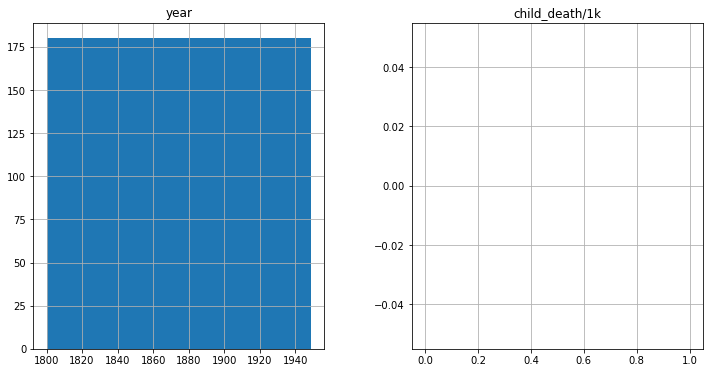

In [23]:
# Draw a histogram for subset of the data that contain the NaN values
df_child_mortality[df_child_mortality['child_death/1k'].isnull()].hist(figsize=(12,6));

> it seems like there are certain old range of years having missing values

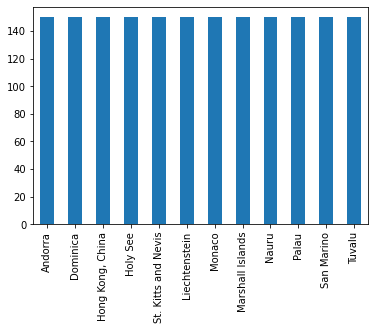

In [24]:
# Checking the distripution of missing values accross the countries
df_nan = df_child_mortality[df_child_mortality['child_death/1k'].isnull()]
df_nan['country'].value_counts().plot(kind='bar');

In [25]:
# The years that having the missing values
df_child_mortality[df_child_mortality['child_death/1k'].isnull()]['year'].values

array(['1800-01-01T00:00:00.000000000', '1800-01-01T00:00:00.000000000',
       '1800-01-01T00:00:00.000000000', ...,
       '1949-01-01T00:00:00.000000000', '1949-01-01T00:00:00.000000000',
       '1949-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

> So based on the above analysis it seems that there is a certain old era having missing values for certain countries

>So i decided to cut the data from the old years that have missing values to make the data consistant across all the years with all the countries

In [26]:
# Cuting the old years that having missing values
df_child_mortality = df_child_mortality[df_child_mortality['year'] > '1949']

In [27]:
# Checking any NaN values
df_child_mortality.isnull().sum()

country           0
year              0
child_death/1k    0
dtype: int64

converting the Child_deaths column to int is now will be applicable 

In [28]:
# Converting the Child_death column from float to integer
df_child_mortality['child_death/1k'] = df_child_mortality['child_death/1k'].astype(int)
df_child_mortality.dtypes

country                   object
year              datetime64[ns]
child_death/1k             int32
dtype: object

In [29]:
# Checking for duplicated rows
df_child_mortality.duplicated().sum()

0

**3. [Education] indicator dataset Cleaning process:**

In [30]:
df_literacy.head()

country  year  adult_literacy_rate
0        Aruba  1975                  NaN
1  Afghanistan  1975                  NaN
2       Angola  1975                  NaN
3     Anguilla  1975                  NaN
4      Albania  1975                  NaN

**3.1 Checking the data types**

In [31]:
df_literacy.dtypes

country                 object
year                    object
adult_literacy_rate    float64
dtype: object

In [32]:
# Converting the year column to date type
df_literacy['year'] = pd.to_datetime(df_literacy['year'])
df_literacy.dtypes

country                        object
year                   datetime64[ns]
adult_literacy_rate           float64
dtype: object

**3.2 Checking for NaN values & Duplicated rows**

In [33]:
df_literacy.isnull().sum()

country                   0
year                      0
adult_literacy_rate    5197
dtype: int64

>Checking if the NaN values follows certain criteria

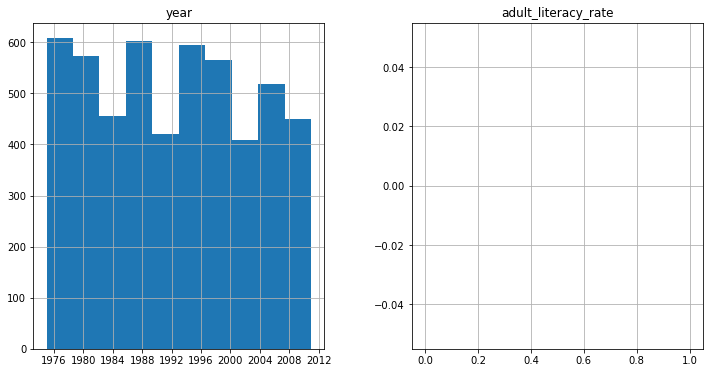

In [34]:
# Draw a histogram for subset of the data that contain the NaN values
df_literacy[df_literacy['adult_literacy_rate'].isnull()].hist(figsize=(12,6));

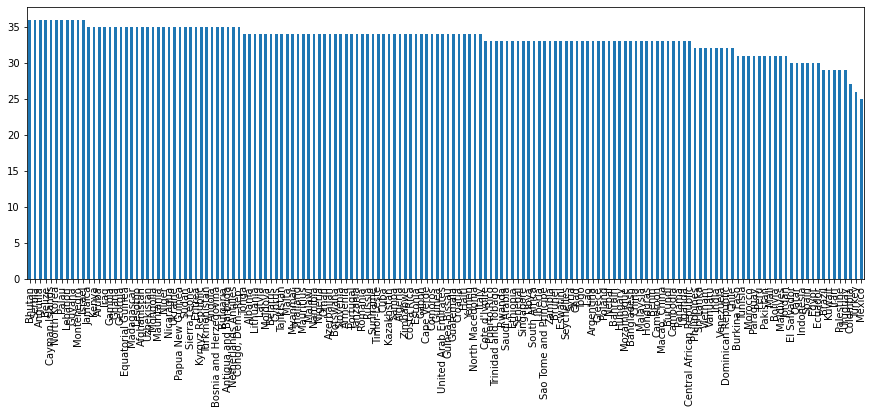

In [35]:
# Checking the distripution of missing values accross the countries
df_nan = df_literacy[df_literacy['adult_literacy_rate'].isnull()]
df_nan['country'].value_counts().plot(kind='bar', figsize=(15,5));

In [36]:
# Checking the number of countries having missing values
df_nan['country'].value_counts().count()

156

In [37]:
# Checking the number of countries in the main datframe
df_literacy.country.nunique()

156

> So based on the above analysis it seems that the missing values are distriputed accross the countries

> So i decided to drop the rows that having missing values

In [38]:
# Droping any rows with missing values
df_literacy.dropna(axis=0, inplace=True)

In [39]:
# Checking for any NaN values
df_literacy.isnull().sum()

country                0
year                   0
adult_literacy_rate    0
dtype: int64

In [40]:
# Checking for duplicated rows
df_literacy.duplicated().sum()

0

**4. [GDP per capita] indicator dataset Cleaning process:**

In [41]:
df_gdp.head()

country  year gdp/person
0           Afghanistan  1800        683
1                Angola  1800        700
2               Albania  1800        755
3               Andorra  1800       1360
4  United Arab Emirates  1800       1130

**4.1 Checking the data types**

In [42]:
df_gdp.dtypes

country       object
year          object
gdp/person    object
dtype: object

In [43]:
# Converting the year column to date type
df_gdp['year'] = pd.to_datetime(df_gdp['year'])
df_gdp.dtypes

country               object
year          datetime64[ns]
gdp/person            object
dtype: object

>Checking the 'gdp/person' column

In [44]:
df_gdp['gdp/person'].values

array([683, 700, 755, ..., '19.7k', '5680', '5920'], dtype=object)

*seems that the 'gdp/person' column values contain K and M Abbreviations*

*converting abbreviations to numbers*

In [45]:
# Converting K to 10**3 and M to 10**6
# replacing dictionary
repl_dict = {'[kK]': '*1e3', '[mM]': '*1e6', '[bB]': '*1e9'}
# Converting and evaluating 
df_gdp['gdp/person'] = df_gdp['gdp/person'].replace(repl_dict, regex=True).map(pd.eval)

In [46]:
# Checking for conversion
df_gdp['gdp/person'].values

array([  683.,   700.,   755., ..., 19700.,  5680.,  5920.])

In [47]:
# Checking data types
df_gdp.dtypes

country               object
year          datetime64[ns]
gdp/person           float64
dtype: object

**4.2 Checking for NaN values & Duplicated rows**

In [48]:
df_gdp.isnull().sum()

country       0
year          0
gdp/person    0
dtype: int64

In [49]:
# Checking for duplicated rows
df_gdp.duplicated().sum()

0

**5. [Extreme Poverty] indicator dataset Cleaning process:**

In [50]:
df_poverty.head()

country  year  poverty_ratio
0                Angola  1967            NaN
1               Albania  1967            NaN
2  United Arab Emirates  1967            NaN
3             Argentina  1967            NaN
4               Armenia  1967            NaN

**5.1 Checking the data types**

In [51]:
df_poverty.dtypes

country           object
year              object
poverty_ratio    float64
dtype: object

In [52]:
# Converting the year column to date type
df_poverty['year'] = pd.to_datetime(df_poverty['year'])
df_poverty.dtypes

country                  object
year             datetime64[ns]
poverty_ratio           float64
dtype: object

**5.2 Checking for NaN values & Duplicated rows**

In [53]:
df_poverty.isnull().sum()

country             0
year                0
poverty_ratio    7402
dtype: int64

>Checking if the NaN values follows certain criteria

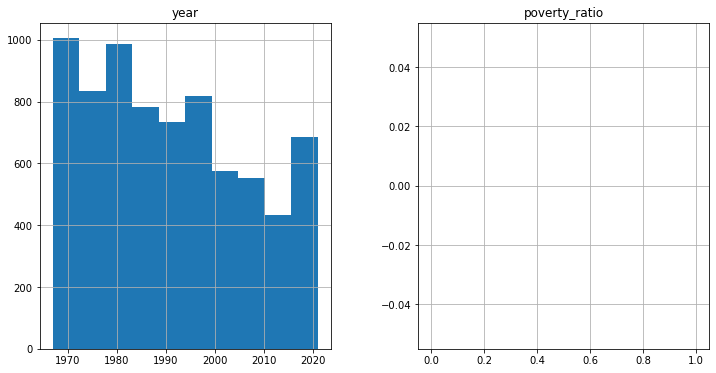

In [54]:
# Draw a histogram for subset of the data that contain the NaN values
df_poverty[df_poverty['poverty_ratio'].isnull()].hist(figsize=(12,6));

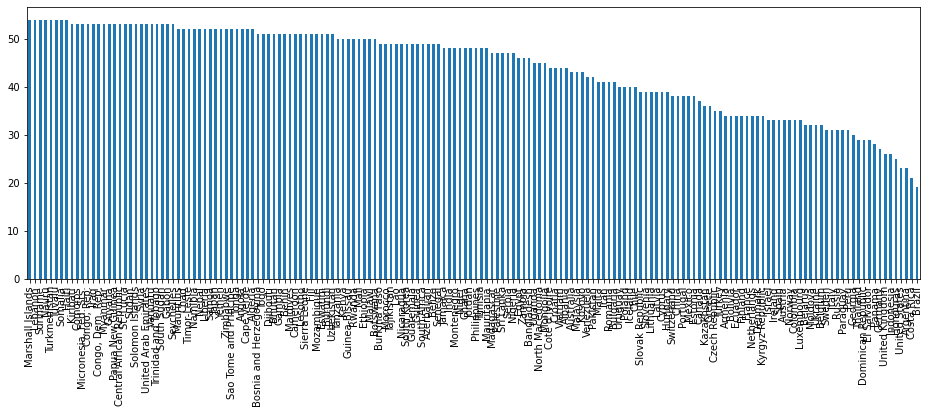

In [55]:
# Checking the distripution of missing values accross the countries
df_nan = df_poverty[df_poverty['poverty_ratio'].isnull()]
df_nan['country'].value_counts().plot(kind='bar', figsize=(16,5));

In [56]:
# Checking the number of countries having missing values
df_nan['country'].value_counts().count()

168

In [57]:
# Checking the number of countries in the main datframe
df_poverty.country.nunique()

168

> So based on the above analysis it seems that the missing values are distriputed accross the countries

> So i decided to drop the rows that having missing values

In [58]:
# Droping any rows with missing values
df_poverty.dropna(axis=0, inplace=True)

In [59]:
# Checking for any NaN values
df_poverty.isnull().sum()

country          0
year             0
poverty_ratio    0
dtype: int64

In [60]:
# Checking for duplicated rows
df_poverty.duplicated().sum()

0

**6. [Population] indicator dataset Cleaning process:**

In [61]:
df_population.head()

country  year total_population
0           Afghanistan  1800            3.28M
1                Angola  1800            1.57M
2               Albania  1800             400k
3               Andorra  1800             2650
4  United Arab Emirates  1800            40.2k

**6.1 Checking the data types**

In [62]:
df_population.dtypes

country             object
year                object
total_population    object
dtype: object

In [63]:
# Converting the year column to date type
df_population['year'] = pd.to_datetime(df_population['year'])
df_population.dtypes

country                     object
year                datetime64[ns]
total_population            object
dtype: object

>Checking the 'total_population' column

In [64]:
df_population['total_population'].values

array(['3.28M', '1.57M', '400k', ..., '79.2M', '81.5M', '31M'],
      dtype=object)

*seems that the 'total_population' column values contain K and M Abbreviations*

*converting abbreviations to numbers*

In [65]:
# Converting K to 10**3 and M to 10**6
# replacing dictionary
repl_dict = {'[kK]': '*1e3', '[mM]': '*1e6', '[bB]': '*1e9'}
# Converting and evaluating 
df_population['total_population'] = df_population['total_population'].replace(repl_dict, regex=True).map(pd.eval)

In [66]:
# Checking for conversion
df_population['total_population'].values

array([ 3280000.,  1570000.,   400000., ..., 79200000., 81500000.,
       31000000.])

In [67]:
# Checking data types
df_population.dtypes

country                     object
year                datetime64[ns]
total_population           float64
dtype: object

**6.2 Checking for NaN values & Duplicated rows**

In [68]:
df_population.isnull().sum()

country             0
year                0
total_population    0
dtype: int64

In [69]:
# Checking for duplicated rows
df_population.duplicated().sum()

0

**7. [Fertility Rate] indicator dataset Cleaning process:**

In [70]:
df_fertility.head()

country  year  total_births/woman
0        Aruba  1960                4.82
1  Afghanistan  1960                7.45
2       Angola  1960                6.71
3      Albania  1960                6.49
4      Andorra  1960                 NaN

**7.1 Checking the data types**

In [71]:
df_fertility.dtypes

country                object
year                   object
total_births/woman    float64
dtype: object

In [72]:
# Converting the year column to date type
df_fertility['year'] = pd.to_datetime(df_fertility['year'])
df_fertility.dtypes

country                       object
year                  datetime64[ns]
total_births/woman           float64
dtype: object

**7.2 Checking for NaN values & Duplicated rows**

In [73]:
df_fertility.isnull().sum()

country                 0
year                    0
total_births/woman    740
dtype: int64

>Checking if the NaN values follows certain criteria

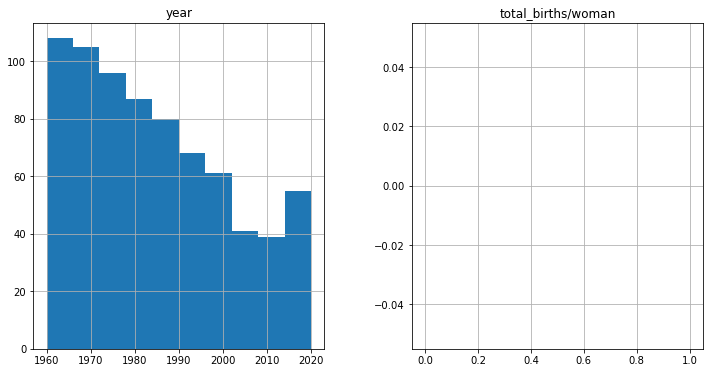

In [74]:
# Draw a histogram for subset of the data that contain the NaN values
df_fertility[df_fertility['total_births/woman'].isnull()].hist(figsize=(12,6));

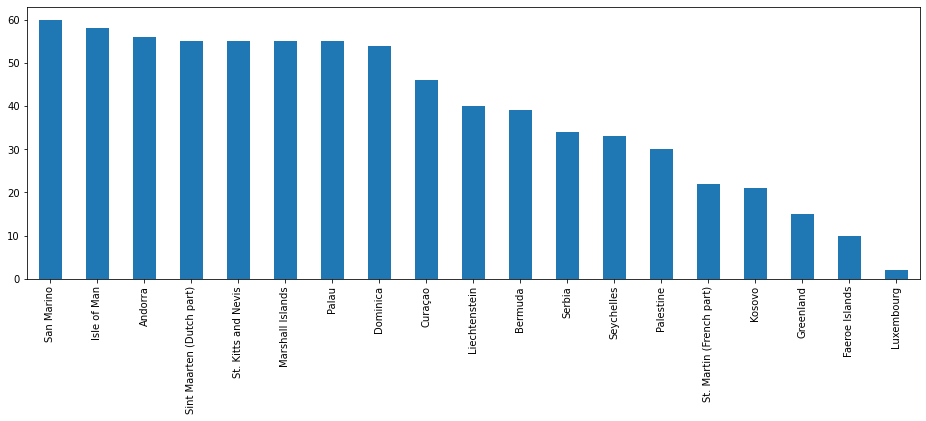

In [75]:
# Checking the distripution of missing values accross the countries
df_nan = df_fertility[df_fertility['total_births/woman'].isnull()]
df_nan['country'].value_counts().plot(kind='bar', figsize=(16,5));

In [76]:
# Checking the number of countries having missing values
df_nan['country'].value_counts().count()

19

In [77]:
# Checking the number of countries in the main datframe
df_fertility.country.nunique()

208

> So based on the above analysis it seems that the missing values are with in certain countries accross all the years

> So i decided to drop the rows that having missing values

In [78]:
# Droping any rows with missing values
df_fertility.dropna(axis=0, inplace=True)

In [79]:
# Checking for any NaN values
df_fertility.isnull().sum()

country               0
year                  0
total_births/woman    0
dtype: int64

In [80]:
# Checking for duplicated rows
df_fertility.duplicated().sum()

0

**8. [Energy Use] indicator dataset Cleaning process:**

In [81]:
df_energy_use.head()

country  year energy/person
0                Angola  1960           NaN
1               Albania  1960           NaN
2  United Arab Emirates  1960           NaN
3             Argentina  1960           NaN
4               Armenia  1960           NaN

**8.1 Checking the data types**

In [82]:
df_energy_use.dtypes

country          object
year             object
energy/person    object
dtype: object

In [83]:
# Converting the year column to date type
df_energy_use['year'] = pd.to_datetime(df_energy_use['year'])
df_energy_use.dtypes

country                  object
year             datetime64[ns]
energy/person            object
dtype: object

**8.2 Checking for NaN values & Duplicated rows**

In [84]:
df_energy_use.isnull().sum()

country             0
year                0
energy/person    3618
dtype: int64

>Checking if the NaN values follows certain criteria

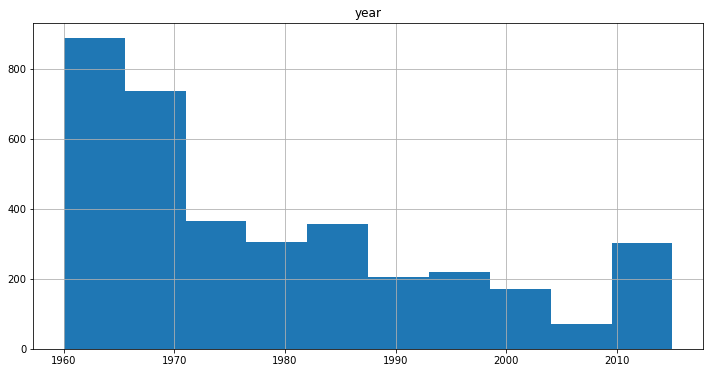

In [85]:
# Draw a histogram for subset of the data that contain the NaN values
df_energy_use[df_energy_use['energy/person'].isnull()].hist(figsize=(12,6));

In [86]:
# Checking the last year in the dataframe
df_energy_use['year'].unique().max()

numpy.datetime64('2015-01-01T00:00:00.000000000')

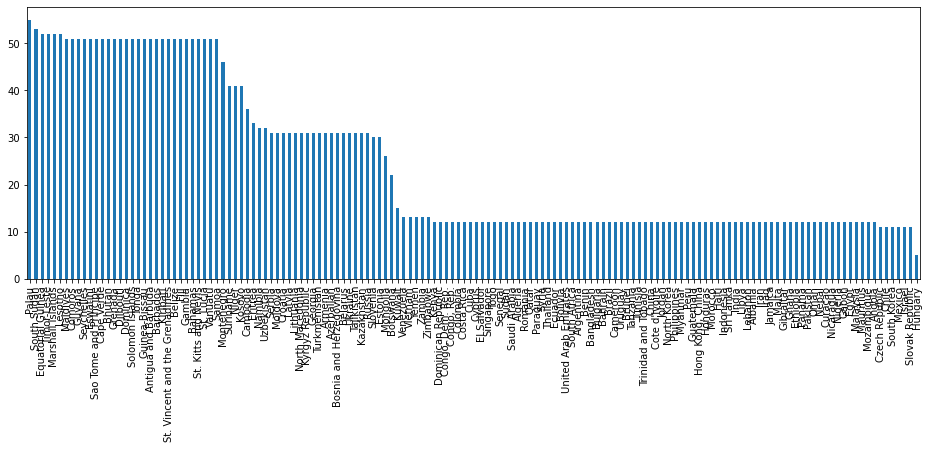

In [87]:
# Checking the distripution of missing values accross the countries
df_nan = df_energy_use[df_energy_use['energy/person'].isnull()]
df_nan['country'].value_counts().plot(kind='bar', figsize=(16,5));

In [88]:
# Checking the number of countries having missing values
df_nan['country'].value_counts().count()

148

In [89]:
# Checking the number countries in the main dataframe
df_energy_use.country.nunique()

173

> So based on the above analysis it seems that the missing values are with almost all the countries accross all the years

> So i decided to drop the rows that having missing values

In [90]:
# Droping any rows with missing values
df_energy_use.dropna(axis=0, inplace=True)

In [91]:
# Checking for any NaN values
df_energy_use.isnull().sum()

country          0
year             0
energy/person    0
dtype: int64

In [92]:
# Checking for duplicated rows
df_fertility.duplicated().sum()

0

>Checking the 'energy/person' column

In [93]:
# Checking if 'k' abbreviations exists in 'energy/person' Column
df_energy_use['energy/person'].str.contains('k').any()

True

*seems that the 'energy/person' column values contain K and M Abbreviations*

*converting abbreviations to numbers*

In [94]:
# Converting K to 10**3 and M to 10**6
# replacing dictionary
repl_dict = {'[kK]': '*1e3', '[mM]': '*1e6', '[bB]': '*1e9'}
# Converting and evaluating 
df_energy_use['energy/person'] = df_energy_use['energy/person'].replace(repl_dict, regex=True).map(pd.eval)

In [95]:
# Checking for conversion
df_energy_use['energy/person'].values

array([3060., 1550., 2520., ..., 5100., 1650., 6800.])

In [96]:
# Checking data types
df_energy_use.dtypes

country                  object
year             datetime64[ns]
energy/person           float64
dtype: object

**9. [CO2 Emission] indicator dataset Cleaning process:**

In [97]:
df_co2.head()

country  year tonnes_co2/person
0           Afghanistan  1800               NaN
1                Angola  1800               NaN
2               Albania  1800               NaN
3               Andorra  1800               NaN
4  United Arab Emirates  1800               NaN

**9.1 Checking the data types**

In [98]:
df_co2.dtypes

country              object
year                 object
tonnes_co2/person    object
dtype: object

In [99]:
# Converting the year column to date type
df_co2['year'] = pd.to_datetime(df_co2['year'])
df_co2.dtypes

country                      object
year                 datetime64[ns]
tonnes_co2/person            object
dtype: object

**9.2 Checking for NaN values & Duplicated rows**

In [100]:
df_co2.isnull().sum()

country                  0
year                     0
tonnes_co2/person    24249
dtype: int64

>Checking if the NaN values follows certain criteria

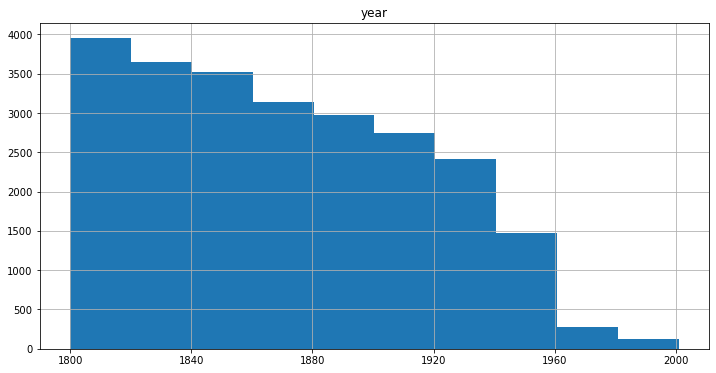

In [101]:
# Draw a histogram for subset of the data that contain the NaN values
df_co2[df_co2['tonnes_co2/person'].isnull()].hist(figsize=(12,6));

In [102]:
# Checking the last year in the dataframe
df_co2['year'].unique().max()

numpy.datetime64('2018-01-01T00:00:00.000000000')

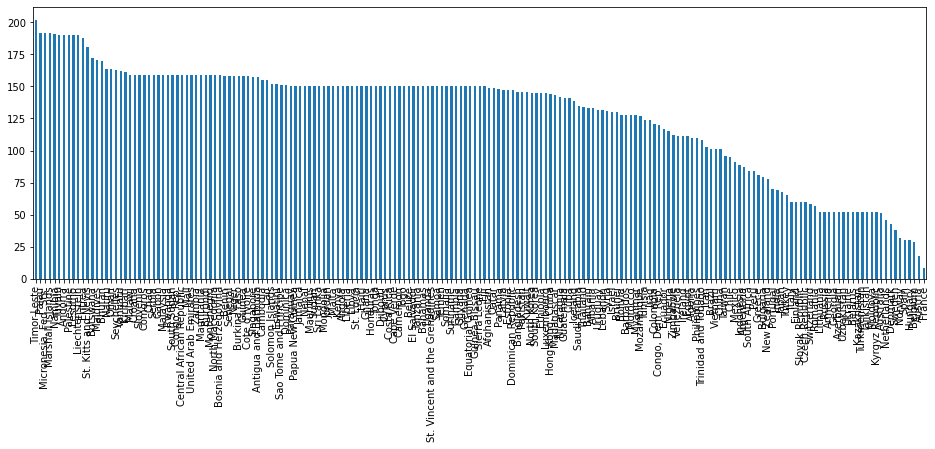

In [103]:
# Checking the distripution of missing values accross the countries
df_nan = df_co2[df_co2['tonnes_co2/person'].isnull()]
df_nan['country'].value_counts().plot(kind='bar', figsize=(16,5));

In [104]:
# Checking the number of countries having missing values
df_nan['country'].value_counts().count()

189

In [105]:
# Checking the number of countries in the main dataframe
df_co2.country.nunique()

194

> So based on the above analysis it seems that the missing values are with almost all the countries and almost all the years except for the earlier era

> So i decided to drop the rows that having missing values

In [106]:
# Droping any rows with missing values
df_co2.dropna(axis=0, inplace=True)

In [107]:
# Checking for any NaN values
df_co2.isnull().sum()

country              0
year                 0
tonnes_co2/person    0
dtype: int64

In [108]:
# Checking for duplicated rows
df_co2.duplicated().sum()

0

>Checking the 'tonnes_co2/person' column

In [109]:
# Checking if 'µ' abbreviations exists in 'tonnes_co2/person' Column
df_co2['tonnes_co2/person'].str.contains('µ').sum()

13

*seems that the 'tonnes_co2/person' column values contain µ  Abbreviation*

*converting the µ abbreviation to the appropriate value*

In [110]:
# Converting µ to 1e-5
# replacing dictionary
repl_dict = {'[µ]': '*1e-5'}
# Converting and evaluating 
df_co2['tonnes_co2/person'] = df_co2['tonnes_co2/person'].replace(repl_dict, regex=True).map(pd.eval)

In [111]:
# Checking for conversion
df_co2['tonnes_co2/person'].values

array([7.33e-03, 4.42e-02, 2.48e+00, ..., 8.10e+00, 3.02e-01, 8.50e-01])

In [112]:
# Checking data types
df_co2.dtypes

country                      object
year                 datetime64[ns]
tonnes_co2/person           float64
dtype: object

**Appending country's code for all the dataframes**

In [113]:
# generate country code  based on country name 

def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3  # .alpha_3 means 3-letter country code 
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE

In [114]:
# 1) create a code column for undernourishment dataframe 
df_undernourishment['code']=alpha3code(df_undernourishment.country)
df_undernourishment.head()

country       year  undernourishment_rate code
0           Afghanistan 2001-01-01                   47.8  AFG
1                Angola 2001-01-01                   67.5  AGO
2               Albania 2001-01-01                    4.9  ALB
3  United Arab Emirates 2001-01-01                    3.3  ARE
4             Argentina 2001-01-01                    3.0  ARG

In [115]:
# 2) create a code column for child mortality dataframe
df_child_mortality['code']=alpha3code(df_child_mortality.country)

# 3) create a code column for literacy dataframe
df_literacy['code']=alpha3code(df_literacy.country)

# 4) create a code column for gdp dataframe
df_gdp['code']=alpha3code(df_gdp.country)

# 5) create a code column for poverty dataframe
df_poverty['code']=alpha3code(df_poverty.country)

# 6) create a code column for population dataframe
df_population['code']=alpha3code(df_population.country)

# 7) create a code column for fertility dataframe
df_fertility['code']=alpha3code(df_fertility.country)

# 8) create a code column for energy use dataframe
df_energy_use['code']=alpha3code(df_energy_use.country)

# 9) create a code column for co2 dataframe
df_co2['code']=alpha3code(df_co2.country)

## 3. Exploratory Data Analysis

### 3.1 Research Question 1: What are the top twenty leading countries across key metrics indicators in recent years?

**(1) Hunger and Undernourishment Indicator**

In [116]:
# Earliest year on the data record
df_undernourishment.year.max()

Timestamp('2019-01-01 00:00:00')

In [117]:
# Selecting 2019 year data
df_undernourishment_2019 = df_undernourishment[df_undernourishment['year'] == '2019']

# Sorting the values ascendingly
df_undernourishment_2019_sorted = df_undernourishment_2019.sort_values(by=['undernourishment_rate']).iloc[:20]

# Selecting the axis from the sorted dataframe [Country], [Indicator Value]
country_col = df_undernourishment_2019_sorted['country']
undernourishment_col = df_undernourishment_2019_sorted['undernourishment_rate']

In [118]:
# Function for plotting the horizontal bar chart

def plot_barh(x, y, x_label, title):
    plt.rcdefaults()
    fig, ax = plt.subplots()

    ax.barh(x, y, align='center')
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel(x_label)
    ax.set_title(title)

    plt.show()

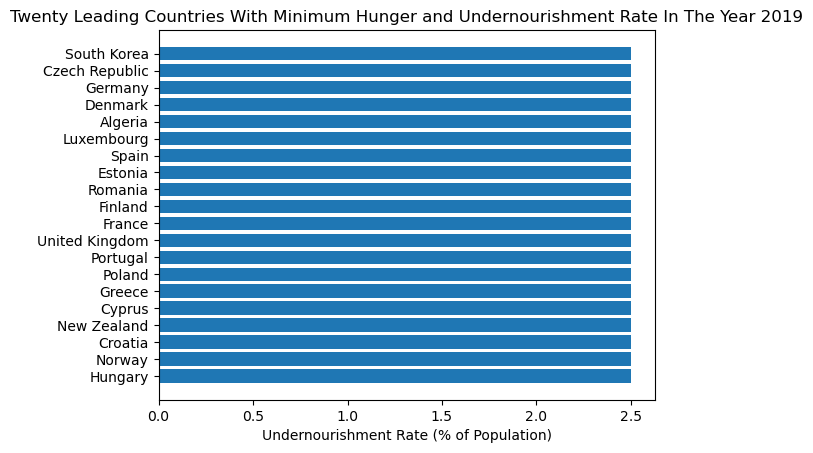

In [119]:
# Plotting the horizontal bar chart with the aid of the 'plot_barh' function
plot_barh(country_col, undernourishment_col, 'Undernourishment Rate (% of Population)',
          'Twenty Leading Countries With Minimum Hunger and Undernourishment Rate In The Year 2019')

As we can see that the the top twenty leading countries with minimum undernourishment rate were almostly having the same **2.5%** of population which can till us dose these countries really having the same percentage in the year 2019 or we have to check the credibility of the data gathered from GAPMINDER  

**(2) Child Mortality Indicator**

In [120]:
# Earliest year on the data record
df_child_mortality.year.max()

Timestamp('2100-01-01 00:00:00')

In [121]:
# Selecting 2021 year data
df_child_mortality_2021 = df_child_mortality[df_child_mortality['year'] == '2021']

# Sorting the values ascendingly
df_child_mortality_2021_sorted = df_child_mortality_2021.sort_values(by=['child_death/1k']).iloc[:20]

# Selecting the axis from the sorted dataframe [Country], [Indicator Value]
country_col = df_child_mortality_2021_sorted['country']
child_mortality_col = df_child_mortality_2021_sorted['child_death/1k']

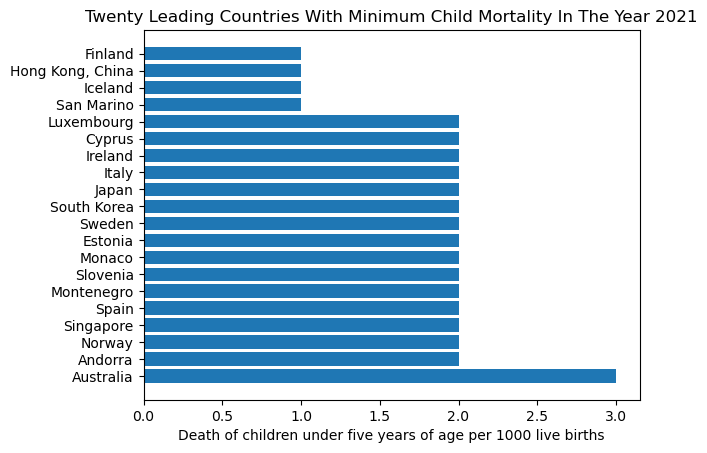

In [122]:
# Plotting the horizontal bar chart with the aid of the 'plot_barh' function
plot_barh(country_col, child_mortality_col, 'Death of children under five years of age per 1000 live births',
          'Twenty Leading Countries With Minimum Child Mortality In The Year 2021')

As we can see that the the top twenty leading countries with minimum child mortality rate were having from **1** to **3** child deaths per 1000 live births in the year 2021 

**(3) Education Indicator**

In [123]:
# Earliest year on the data record
df_literacy.year.max()

Timestamp('2011-01-01 00:00:00')

In [124]:
# Selecting 2011 year data
df_literacy_2011 = df_literacy[df_literacy['year'] == '2011']

# Sorting the values descendingly
df_literacy_2011_sorted = df_literacy_2011.sort_values(by=['adult_literacy_rate'], ascending=False).iloc[:20]

# Selecting the axis from the sorted dataframe [Country], [Indicator Value]
country_col = df_literacy_2011_sorted['country']
literacy_col = df_literacy_2011_sorted['adult_literacy_rate']

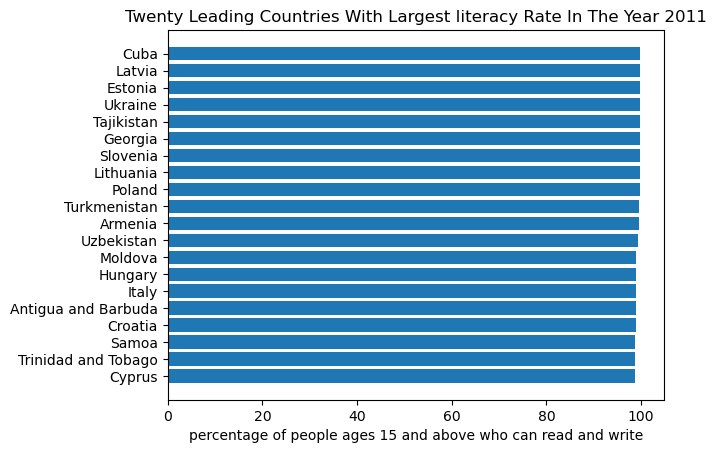

In [125]:
# Plotting the horizontal bar chart with the aid of the 'plot_barh' function
plot_barh(country_col, literacy_col, 'percentage of people ages 15 and above who can read and write',
          'Twenty Leading Countries With Largest literacy Rate In The Year 2011')

As we can see that the the top twenty leading countries with largest adult literacy rate were having from almostly **99%** to **100%** of people ages 15 and above in the year 2011 

**(4) GDP per capita Indicator**

In [126]:
# Earliest year on the data record
df_gdp.year.max()

Timestamp('2050-01-01 00:00:00')

In [127]:
# Selecting 2021 year data
df_gdp_2021 = df_gdp[df_gdp['year'] == '2021']

# Sorting the values descendingly
df_gdp_2021_sorted = df_gdp_2021.sort_values(by=['gdp/person'], ascending=False).iloc[:20]

# Selecting the axis from the sorted dataframe [Country], [Indicator Value]
country_col = df_gdp_2021_sorted['country']
gdp_col = df_gdp_2021_sorted['gdp/person']

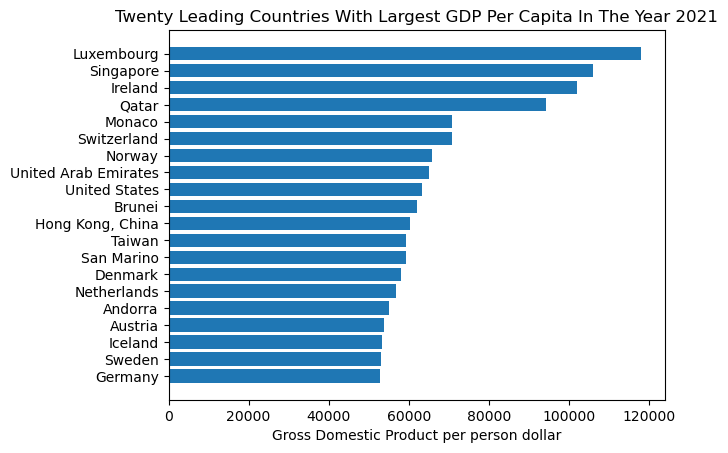

In [128]:
# Plotting the horizontal bar chart with the aid of the 'plot_barh' function
plot_barh(country_col, gdp_col, 'Gross Domestic Product per person dollar',
          'Twenty Leading Countries With Largest GDP Per Capita In The Year 2021')

As we can see that the the top twenty leading countries with largest GDP per capital were having from almostly **50,000** to **120,000 dollar** in the year 2021 

**(5) Extreme Poverty Indicator**

In [129]:
# Earliest year on the data record
df_poverty.year.max()

Timestamp('2021-01-01 00:00:00')

In [130]:
# Data on 2021 is incomplete 
df_poverty[df_poverty['year'] == '2021']

country       year  poverty_ratio code
9136  Indonesia 2021-01-01           18.0  IDN

In [131]:
# Selecting 2020 year data because 2021 has missing countries
df_poverty_2020 = df_poverty[df_poverty['year'] == '2020']

# Sorting the values ascendingly
df_poverty_2020_sorted = df_poverty_2020.sort_values(by=['poverty_ratio']).iloc[:20]

# Selecting the axis from the sorted dataframe [Country], [Indicator Value]
country_col = df_poverty_2020_sorted['country']
poverty_col = df_poverty_2020_sorted['poverty_ratio']

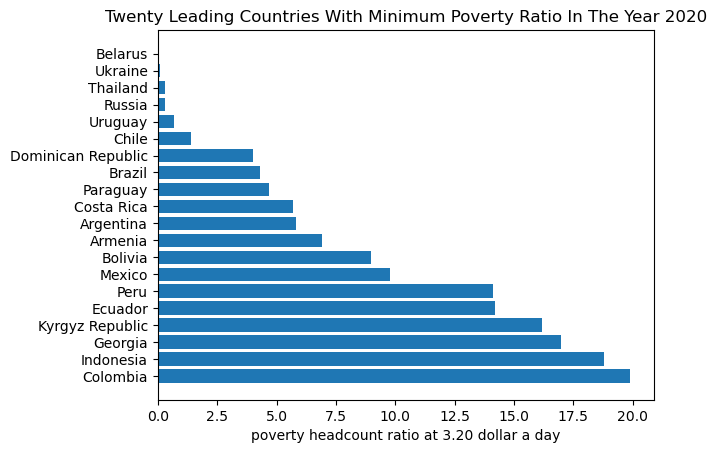

In [132]:
# Plotting the horizontal bar chart with the aid of the 'plot_barh' function
plot_barh(country_col, poverty_col, 'poverty headcount ratio at 3.20 dollar a day',
          'Twenty Leading Countries With Minimum Poverty Ratio In The Year 2020')

As we can see that the the top twenty leading countries with Minimum Poverty ratio were having from almostly **0%** to **20%** of population in the year 2020 

**(6) Population Indicator**

In [133]:
# Earliest year on the data record
df_population.year.max()

Timestamp('2100-01-01 00:00:00')

In [134]:
# Selecting 2021 year data
df_population_2021 = df_population[df_population['year'] == '2021']

# Sorting the values descendingly
df_population_2021_sorted = df_population_2021.sort_values(by=['total_population'], ascending=False).iloc[:20]

# Selecting the axis from the sorted dataframe [Country], [Indicator Value]
country_col = df_population_2021_sorted['country']
population_col = df_population_2021_sorted['total_population']

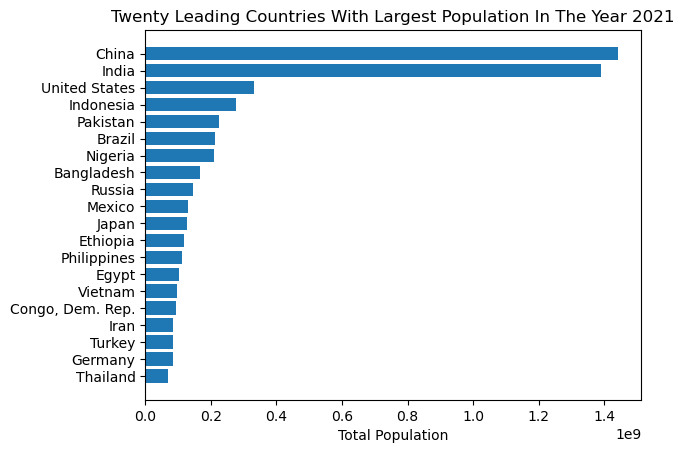

In [135]:
# Plotting the horizontal bar chart with the aid of the 'plot_barh' function
plot_barh(country_col, population_col, 'Total Population',
          'Twenty Leading Countries With Largest Population In The Year 2021')

As we can see that the the top twenty leading countries with largest population size were having from almostly **100 M** to **1.4 B** in the year 2021 with country china and india leading the top

**(7) Fertility Rate Indicator**

In [136]:
# Earliest year on the data record
df_fertility.year.max()

Timestamp('2020-01-01 00:00:00')

In [137]:
# Selecting 2020 year data
df_fertility_2020 = df_fertility[df_fertility['year'] == '2020']

# Sorting the values descendingly
df_fertility_2020_sorted = df_fertility_2020.sort_values(by=['total_births/woman'], ascending=False).iloc[:20]

# Selecting the axis from the sorted dataframe [Country], [Indicator Value]
country_col = df_fertility_2020_sorted['country']
fertility_col = df_fertility_2020_sorted['total_births/woman']

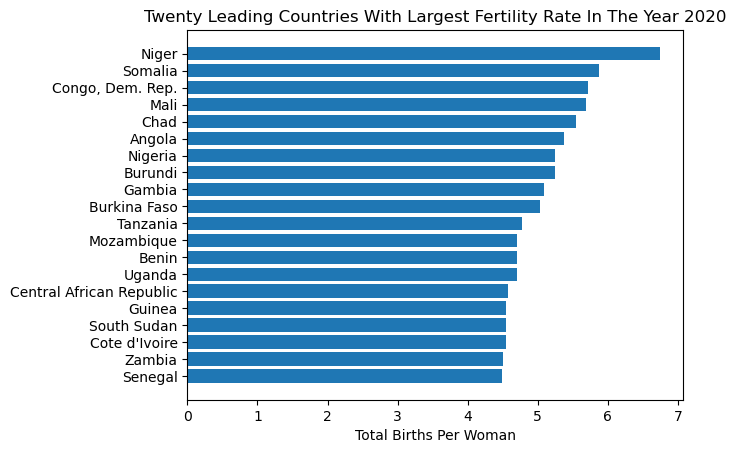

In [138]:
# Plotting the horizontal bar chart with the aid of the 'plot_barh' function
plot_barh(country_col, fertility_col, 'Total Births Per Woman',
          'Twenty Leading Countries With Largest Fertility Rate In The Year 2020')

As we can see that the the top twenty leading countries with largest firtility rate were having from almostly **4** to **7** total births per woman in the year 2020 

**(8) Energy Use Indicator**

In [139]:
# Earliest year on the data record
df_energy_use.year.max()

Timestamp('2015-01-01 00:00:00')

In [140]:
# Checking the data record on 2015
df_energy_use[df_energy_use['year'] == '2015'].shape

(34, 4)

In [141]:
# Selecting 2014 year data because 2015 is incomplete
df_energy_use_2014 = df_energy_use[df_energy_use['year'] == '2014']

# Sorting the values descendingly
df_energy_use_2014_sorted = df_energy_use_2014.sort_values(by=['energy/person'], ascending=False).iloc[:20]

# Selecting the axis from the sorted dataframe [Country], [Indicator Value]
country_col = df_energy_use_2014_sorted['country']
energy_use_col = df_energy_use_2014_sorted['energy/person']

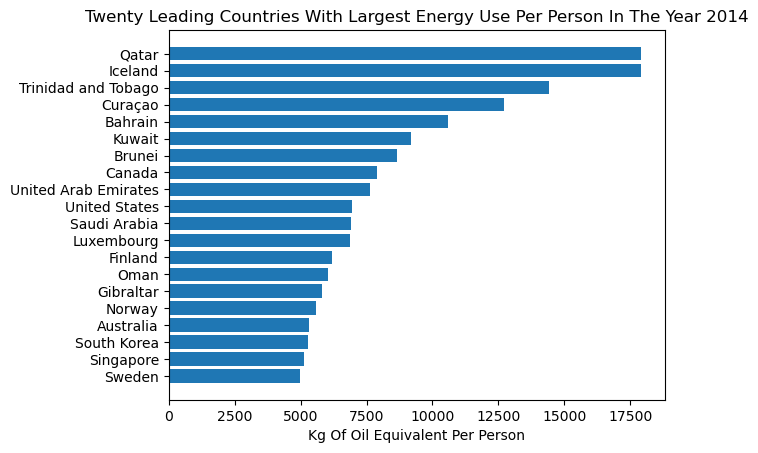

In [142]:
# Plotting the horizontal bar chart with the aid of the 'plot_barh' function
plot_barh(country_col, energy_use_col, 'Kg Of Oil Equivalent Per Person',
          'Twenty Leading Countries With Largest Energy Use Per Person In The Year 2014')

As we can see that the the top twenty leading countries with largest energy use were having from almostly **5000** to **17500** KG of oil equivalent per person in the year 2014 

**(9) CO2 Emissions Indicator**

In [143]:
# Earliest year on the data record
df_co2.year.max()

Timestamp('2018-01-01 00:00:00')

In [144]:
# Checking the data record on 2018
df_co2[df_co2['year'] == '2018'].shape

(194, 4)

In [145]:
# Selecting 2018 year data
df_co2_2018 = df_co2[df_co2['year'] == '2018']

# Sorting the values ascendingly
df_co2_2018_sorted = df_co2_2018.sort_values(by=['tonnes_co2/person']).iloc[:20]

# Selecting the axis from the sorted dataframe [Country], [Indicator Value]
country_col = df_co2_2018_sorted['country']
co2_col = df_co2_2018_sorted['tonnes_co2/person']

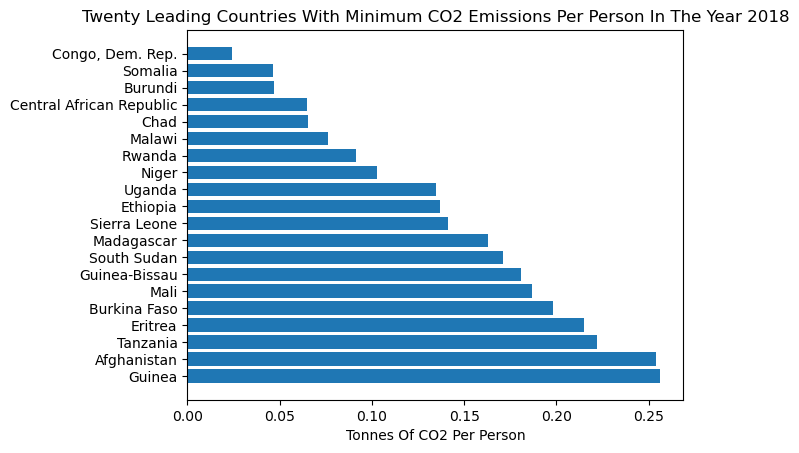

In [146]:
# Plotting the horizontal bar chart with the aid of the 'plot_barh' function
plot_barh(country_col, co2_col, 'Tonnes Of CO2 Per Person',
          'Twenty Leading Countries With Minimum CO2 Emissions Per Person In The Year 2018')

As we can see that the the top twenty leading countries with minimum CO2 emissions were having from almostly **0.02** to **0.25** Tonnes of CO2 per person in the year 2018 

### 3.2 Research Question 2: What does the world choropleth map look like for key metrics indicators in recent years?

**Defining function for Choropleth map ploting**

In [147]:
# defining "map_plot" function for ploting the Choropleth map using plotly library

def map_plot(location, values, texts, color_scale, reverse_scale, bar_tick, bar_title, title):

    fig = go.Figure(data=go.Choropleth(
        locations = location,
        z = values,
        text = texts,
        colorscale = color_scale,
        autocolorscale=False,
        reversescale= reverse_scale,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        colorbar_tickprefix = bar_tick,
        colorbar_title = bar_title,
    ))

    fig.update_layout(
        title_text= title,
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection_type='equirectangular'
        )
    )

    fig.show()

**Ploting each indicator**

**(1) Hunger and Undernourishment Indicator**

In [148]:
# Ploting Choropleth map for undernourishment Rate dataframe with the aid of map_plot function

map_plot(location = df_undernourishment_2019['code'], values = df_undernourishment_2019['undernourishment_rate'],
         texts = df_undernourishment_2019['country'], color_scale = 'Bluered', reverse_scale = False, bar_tick = '%', bar_title = 'Undernourishment<br>Rate',
         title = 'Global Undernourishment Rate In The Year 2019')

**(2) Child Mortality Indicator**

In [149]:
# Ploting Choropleth map for child mortality dataframe with the aid of map_plot function

map_plot(location = df_child_mortality_2021['code'],values = df_child_mortality_2021['child_death/1k'],
         texts = df_child_mortality_2021['country'], color_scale = 'Reds', reverse_scale = False, bar_tick = '', bar_title = 'Child Death/1k<br>Live Birth',
         title = 'Global Child Mortality In The Year 2021')

**(3) Education Indicator**

In [150]:
# Ploting Choropleth map for adult literacy dataframe with the aid of map_plot function

map_plot(location = df_literacy_2011['code'],values = df_literacy_2011['adult_literacy_rate'],
         texts = df_literacy_2011['country'], color_scale = 'solar', reverse_scale = False, bar_tick = '%', bar_title = 'percentage of people ages 15<br>and above who can<br>read and write',
         title = 'Global Adult Literacy Rate In The Year 2011')

**(4) GDP per capita Indicator**

In [151]:
# Ploting Choropleth map for GDP per capital dataframe with the aid of map_plot function

map_plot(location = df_gdp_2021['code'],values = df_gdp_2021['gdp/person'],
         texts = df_gdp_2021['country'], color_scale = 'YlGn', reverse_scale = False, bar_tick = '$', bar_title = 'GDP per person US$',
         title = 'Global GDP Per Capital In The Year 2021')

**(5) Extreme Poverty Indicator**

In [152]:
df_poverty_2018 = df_poverty[df_poverty['year'] == "2018"]

In [153]:
# Ploting Choropleth map for poverty ratio dataframe with the aid of map_plot function

map_plot(location = df_poverty_2018['code'],values = df_poverty_2018['poverty_ratio'],
         texts = df_poverty_2018['country'], color_scale = 'Bluered', reverse_scale = False, bar_tick = '%', bar_title = 'poverty headcount ratio<br>at 3.20 dollar a day',
         title = 'Global Poverty Ratio In The Year 2018')

**(6) Population Indicator**

In [154]:
# Ploting Choropleth map for population dataframe with the aid of map_plot function

map_plot(location = df_population_2021['code'],values = df_population_2021['total_population'],
         texts = df_population_2021['country'], color_scale = 'Reds', reverse_scale = False, bar_tick = '', bar_title = 'Total Population',
         title = 'Global Population In The Year 2021')

**(7) Fertility Rate Indicator**

In [155]:
# Ploting Choropleth map for fertility rate dataframe with the aid of map_plot function

map_plot(location = df_fertility_2020['code'],values = df_fertility_2020['total_births/woman'],
         texts = df_fertility_2020['country'], color_scale = 'Greens', reverse_scale = False, bar_tick = '', bar_title = 'Total Births<br>Per Woman',
         title = 'Global Fertility Rate In The Year 2020')

**(8) Energy Use Indicator**

In [156]:
# Ploting Choropleth map for energy use dataframe with the aid of map_plot function

map_plot(location = df_energy_use_2014['code'],values = df_energy_use_2014['energy/person'],
         texts = df_energy_use_2014['country'], color_scale = 'Electric', reverse_scale = False, bar_tick = '', bar_title = 'Kg Of Oil Equivalent<br>Per Person',
         title = 'Global Energy Use Per Person In The Year 2014')

**(9) CO2 Emissions Indicator**

In [157]:
# Ploting Choropleth map for CO2 emissions dataframe with the aid of map_plot function

map_plot(location = df_co2_2018['code'],values = df_co2_2018['tonnes_co2/person'],
         texts = df_co2_2018['country'], color_scale = 'Greys', reverse_scale = False, bar_tick = '', bar_title = 'Tonnes Of CO2<br>Per Person',
         title = 'Global CO2 Emissions Per Person In The Year 2018')

**Dropping country's code**

In [158]:
# dropping the code column from all the datframe

df_undernourishment.drop(['code'], axis=1, inplace=True)

df_child_mortality.drop(['code'], axis=1, inplace=True)

df_literacy.drop(['code'], axis=1, inplace=True)

df_gdp.drop(['code'], axis=1, inplace=True)

df_poverty.drop(['code'], axis=1, inplace=True)

df_population.drop(['code'], axis=1, inplace=True)

df_fertility.drop(['code'], axis=1, inplace=True)

df_energy_use.drop(['code'], axis=1, inplace=True)

df_co2.drop(['code'], axis=1, inplace=True)

### 3.3 Research Question 3: Are there any relations between indicators?

>**Merging all the data in one master dataframe**

In [159]:
# Merging all the data in one master dataframe
df_master = df_undernourishment.merge(df_child_mortality, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')\
            .merge(df_literacy, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')\
            .merge(df_gdp, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')\
            .merge(df_poverty, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')\
            .merge(df_population, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')\
            .merge(df_fertility, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')\
            .merge(df_energy_use, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')\
            .merge(df_co2, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')

In [160]:
df_master.head()

country       year  undernourishment_rate  child_death/1k  \
0  Argentina 2001-01-01                    3.0              18   
1    Armenia 2001-01-01                   26.1              29   
2    Bolivia 2001-01-01                   27.9              71   
3   Honduras 2001-01-01                   21.9              35   
4  Nicaragua 2001-01-01                   27.5              34   

   adult_literacy_rate  gdp/person  poverty_ratio  total_population  \
0                 97.2     17600.0           19.2        37300000.0   
1                 99.4      4460.0           47.4         3050000.0   
2                 86.7      5400.0           36.1         8580000.0   
3                 80.0      4110.0           36.0         6750000.0   
4                 76.7      4030.0           38.2         5150000.0   

   total_births/woman  energy/person  tonnes_co2/person  
0                2.51         1570.0              3.580  
1                1.63          657.0              1.160  
2                3.97          445.0              0.999  
3                4.10          478.0              0.831  
4                3.02          493.0              0.763

In [161]:
# Checking the number of common rows in all the data frames 
df_master.shape

(123, 11)

**Because we merge all the data records in on master dataframe the common country and years left are much few than the original from each dataframe**

**So i will check the correlations from this master dataframe from all the indicators then i will select the most suspected indicators individually form more relaiable data results**


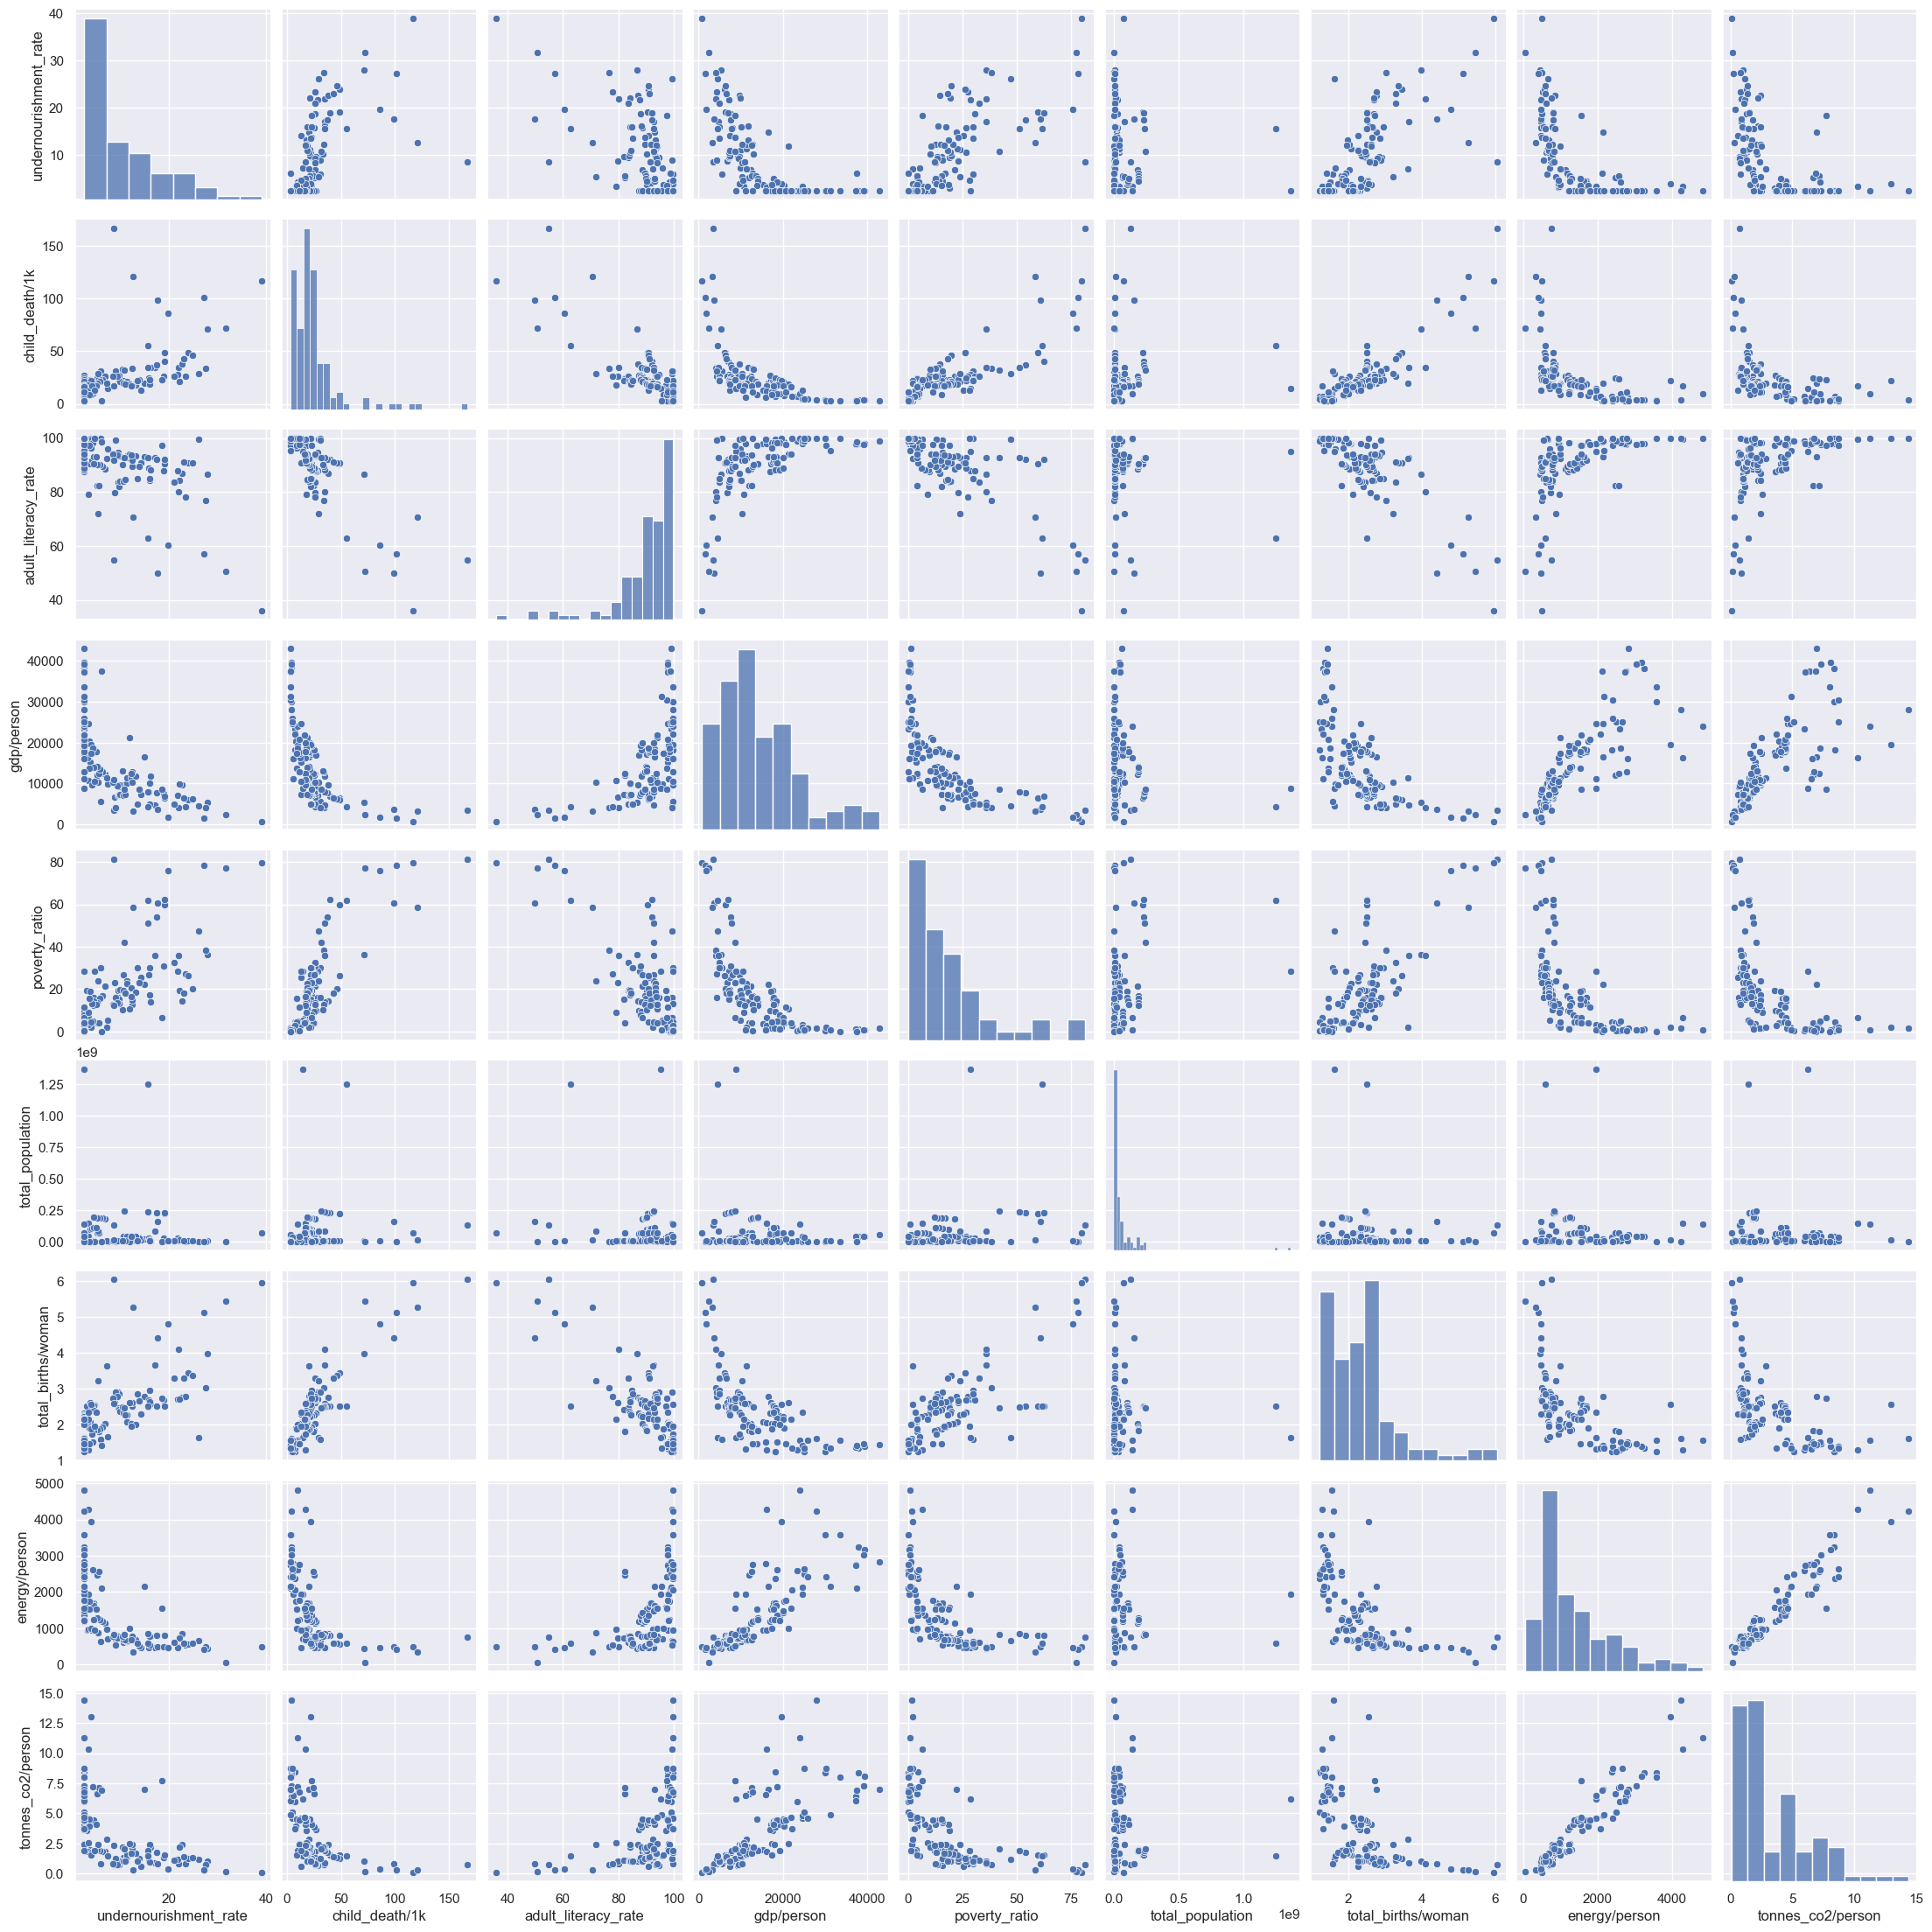

In [162]:
# ploting Scatterplot Matrix from all the indicators in the master datframe
sns.set_theme(style='darkgrid')
sns.pairplot(df_master);

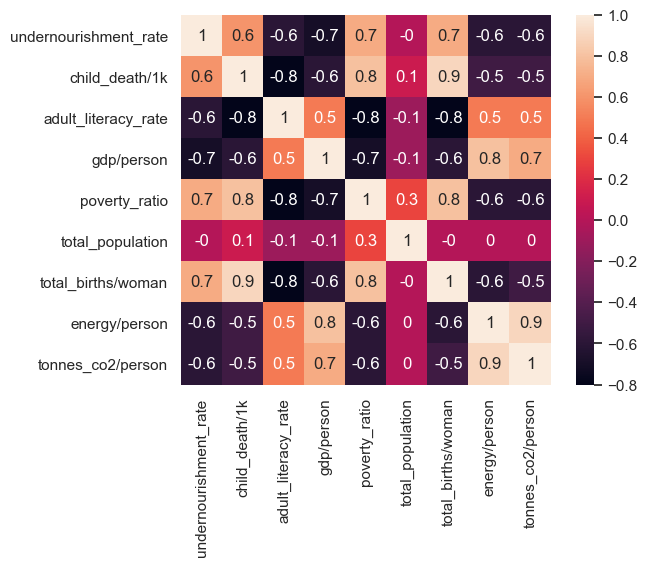

In [163]:
# Ploting Annotated heatmap for the pairwise correlation of columns
sns.heatmap(df_master.corr().round(1), annot=True, square=True);

**From the above analysis, I will select the most correlated variables individually for further reliable analysis** 

**The Relation Between Education and child mortality**

In [164]:
# Merging literacy and Child mortality data frames together
df_literacy_mortality = df_literacy.merge(df_child_mortality, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')
df_literacy_mortality.shape

(561, 4)

C:\Users\Abdo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



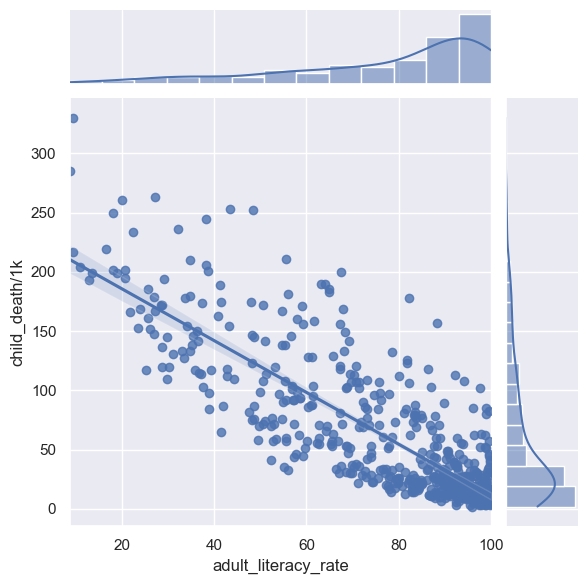

In [165]:
# Ploting the linear regression correlation graph
sns.jointplot('adult_literacy_rate', 'child_death/1k', df_literacy_mortality, kind='reg');

**The Relation Between Education and Extreme Poverty**

In [166]:
# Merging literacy and poverty data frames together
df_literacy_poverty = df_literacy.merge(df_poverty, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')
df_literacy_poverty.shape

(166, 4)

C:\Users\Abdo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



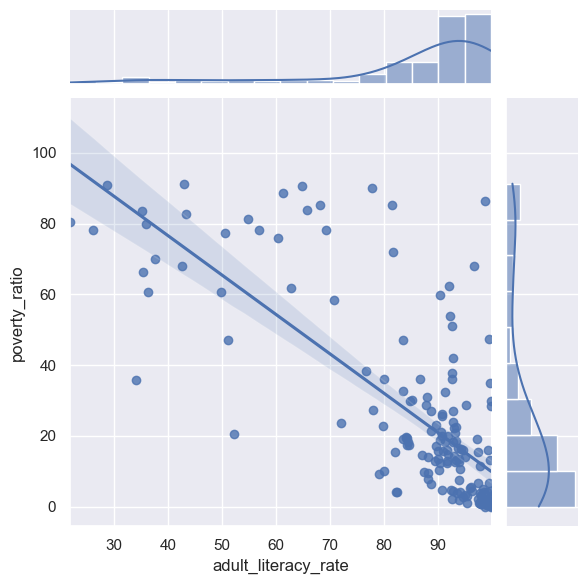

In [167]:
# Ploting the linear regression correlation graph
sns.jointplot('adult_literacy_rate', 'poverty_ratio', df_literacy_poverty, kind='reg');

**The Relation Between Education and Fertility Rate**

In [168]:
# Merging literacy and fertility data frames together
df_literacy_fertility = df_literacy.merge(df_fertility, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')
df_literacy_fertility.shape

(569, 4)

C:\Users\Abdo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



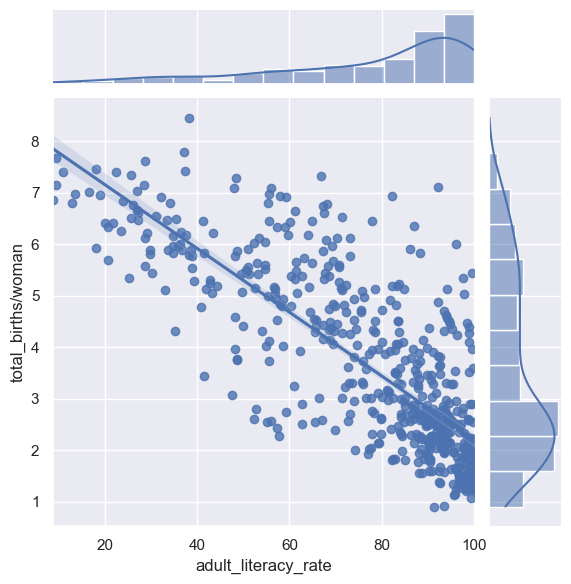

In [169]:
# Ploting the linear regression correlation graph
sns.jointplot('adult_literacy_rate', 'total_births/woman', df_literacy_fertility, kind='reg');

>**From the above analysis we can conclude that there is strong negative correlations between the education (adult literacy rate) with {child mortality, Extreme Poverty and Fertility Rate (total births/woman)}**


**The Relation Between Health (Child Mortality Rate) and Fertility Rate**

In [170]:
# Merging child_mortality and fertility data frames together
df_mortality_fertility = df_child_mortality.merge(df_fertility, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')
df_mortality_fertility.shape

(11238, 4)

C:\Users\Abdo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



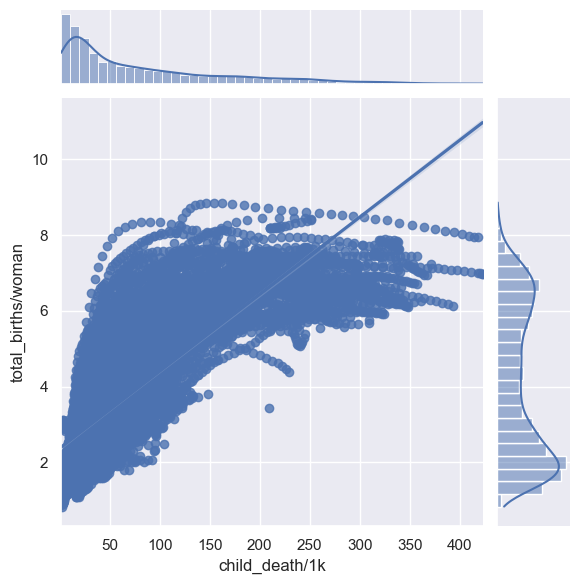

In [171]:
# Ploting the linear regression correlation graph
sns.jointplot('child_death/1k', 'total_births/woman', df_mortality_fertility, kind='reg');

**The Relation Between Health (Child Mortality Rate) and Extreme Poverty**

In [172]:
# Merging child_mortality and poverty data frames together
df_mortality_poverty = df_child_mortality.merge(df_poverty, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')
df_mortality_poverty.shape

(1826, 4)

C:\Users\Abdo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



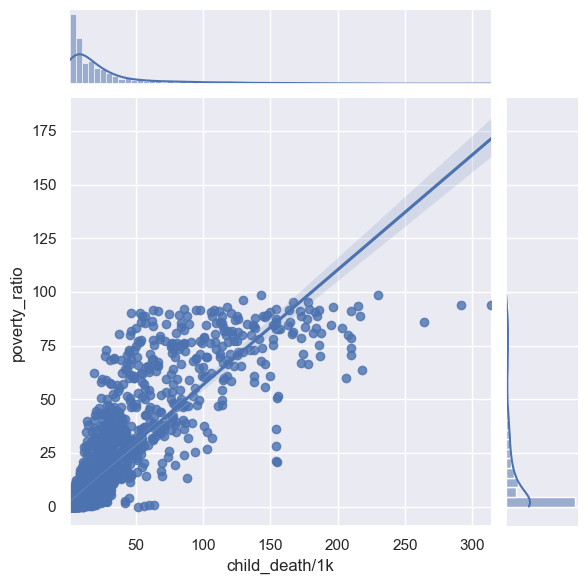

In [173]:
# Ploting the linear regression correlation graph
sns.jointplot('child_death/1k', 'poverty_ratio', df_mortality_poverty, kind='reg');

>**From the above analysis we can conclude that there is strong positive correlations between the Health (child mortality) with {Fertility Rate (total births/woman) and Extreme Poverty}**


**The Relation Between Energy and GDP**

In [174]:
# Merging energy use and gdp data frames together
df_energy_gdp = df_energy_use.merge(df_gdp, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')
df_energy_gdp.shape

(5967, 4)

C:\Users\Abdo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



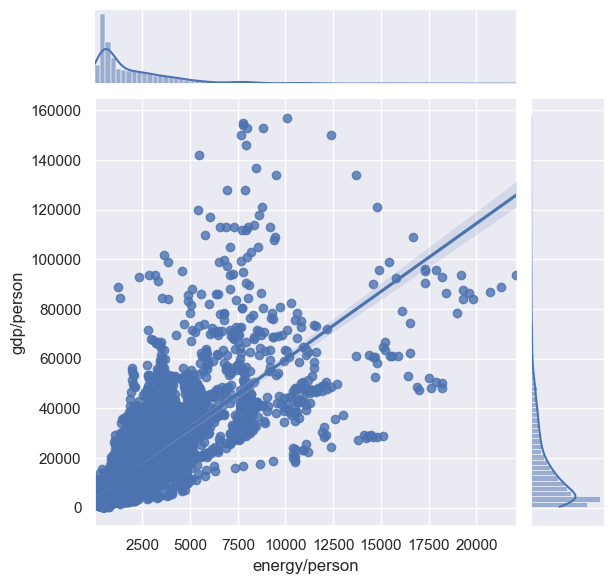

In [175]:
# Ploting the linear regression correlation graph
sns.jointplot('energy/person', 'gdp/person', df_energy_gdp, kind='reg');

**The Relation Between Energy and CO2 Emissions**

In [176]:
# Merging energy use and CO2 data frames together
df_energy_co2 = df_energy_use.merge(df_co2, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')
df_energy_co2.shape

(5964, 4)

C:\Users\Abdo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



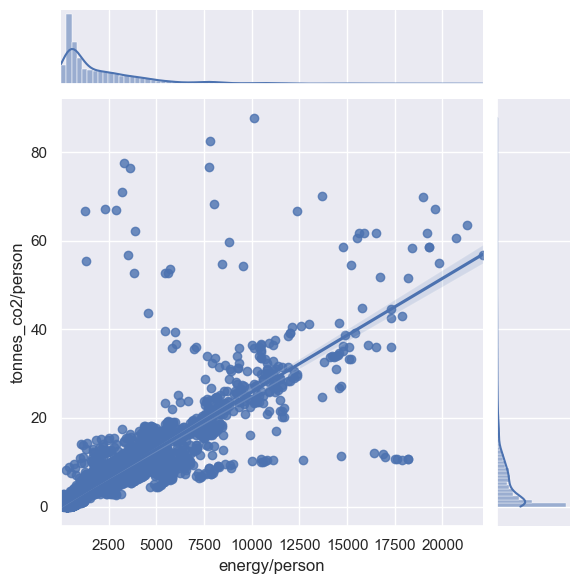

In [177]:
# Ploting the linear regression correlation graph
sns.jointplot('energy/person', 'tonnes_co2/person', df_energy_co2, kind='reg');

>**From the above analysis we can conclude that there is strong positive correlations between Energy Use with {GDP and CO2 Emissions}**


**The Relation Between Extreme Poverty and Fertility Rate**

In [178]:
# Merging poverty and fertility data frames together
df_poverty_fertility = df_poverty.merge(df_fertility, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')
df_poverty_fertility.shape

(1834, 4)

C:\Users\Abdo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



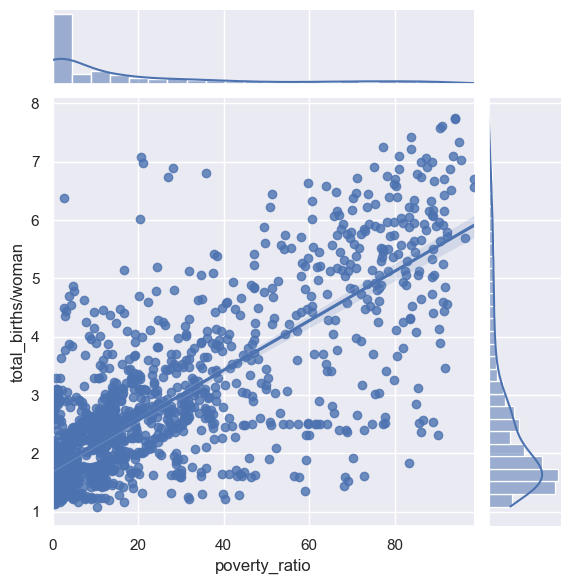

In [179]:
# Ploting the linear regression correlation graph
sns.jointplot('poverty_ratio', 'total_births/woman', df_poverty_fertility, kind='reg');

>**From the above analysis we can conclude that there is strong positive correlation between Extreme Poverty with fertility rate (births/woman)**


>**From all this investigation we can conclude that there are three main indicators affecting others and can make a significant Impact in our world which is:**
>* **Education (Adult Literacy Rate)**
>* **Health (Child Mortality)**
>* **Energy (Use per Person)**

### 3.4 Research Question 4: What are the leading countries for a change from two decades ago?

**(1) Top 20 Countries Improvement In Health (Child mortality) Indicator**

In [180]:
df_child_mortality.head()

country       year  child_death/1k
29550           Afghanistan 1950-01-01             416
29551                Angola 1950-01-01             331
29552               Albania 1950-01-01             280
29553               Andorra 1950-01-01              76
29554  United Arab Emirates 1950-01-01             273

In [181]:
# Selecting the data record in the year 2000
df_mortality_2000 = df_child_mortality.query('year == "2000"')

# Renaming the columns labels to the appropriate year
df_mortality_2000.rename(columns={'year' : 'year_2000', 'child_death/1k' : 'child_death/1k_2000'}, inplace=True)
df_mortality_2000.head()

<ipython-input-181-fb0a8d66ad1a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



country  year_2000  child_death/1k_2000
39400           Afghanistan 2000-01-01                  129
39401                Angola 2000-01-01                  206
39402               Albania 2000-01-01                   25
39403               Andorra 2000-01-01                    6
39404  United Arab Emirates 2000-01-01                   11

In [182]:
# Selecting the data record in the year 2021
df_mortality_2021 = df_child_mortality.query('year == "2021"')

# Renaming the columns labels to the appropriate year
df_mortality_2021.rename(columns={'year' : 'year_2021', 'child_death/1k' : 'child_death/1k_2021'}, inplace=True)
df_mortality_2021.head()

<ipython-input-182-c04ccc4aea42>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



country  year_2021  child_death/1k_2021
43537           Afghanistan 2021-01-01                   56
43538                Angola 2021-01-01                   70
43539               Albania 2021-01-01                    8
43540               Andorra 2021-01-01                    2
43541  United Arab Emirates 2021-01-01                    6

In [183]:
# Merging the two dataframes together on 'country' column
df_mortality_change = df_mortality_2000.merge(df_mortality_2021, left_on='country', right_on='country', how='inner')
df_mortality_change.head()

country  year_2000  child_death/1k_2000  year_2021  \
0           Afghanistan 2000-01-01                  129 2021-01-01   
1                Angola 2000-01-01                  206 2021-01-01   
2               Albania 2000-01-01                   25 2021-01-01   
3               Andorra 2000-01-01                    6 2021-01-01   
4  United Arab Emirates 2000-01-01                   11 2021-01-01   

   child_death/1k_2021  
0                   56  
1                   70  
2                    8  
3                    2  
4                    6

In [184]:
# Adding the change column 
df_mortality_change['mortality_change'] = df_mortality_change['child_death/1k_2000'] - df_mortality_change['child_death/1k_2021']
df_mortality_change.head()

country  year_2000  child_death/1k_2000  year_2021  \
0           Afghanistan 2000-01-01                  129 2021-01-01   
1                Angola 2000-01-01                  206 2021-01-01   
2               Albania 2000-01-01                   25 2021-01-01   
3               Andorra 2000-01-01                    6 2021-01-01   
4  United Arab Emirates 2000-01-01                   11 2021-01-01   

   child_death/1k_2021  mortality_change  
0                   56                73  
1                   70               136  
2                    8                17  
3                    2                 4  
4                    6                 5

In [185]:
# Sorting the values descendingly and selecting the first 20 records
df_mortality_change_sorted = df_mortality_change.sort_values(by=['mortality_change'], ascending=False)[0:20]
df_mortality_change_sorted.head()

country  year_2000  child_death/1k_2000  year_2021  \
150        Rwanda 2000-01-01                  183 2021-01-01   
127         Niger 2000-01-01                  226 2021-01-01   
156  Sierra Leone 2000-01-01                  234 2021-01-01   
1          Angola 2000-01-01                  206 2021-01-01   
124        Malawi 2000-01-01                  173 2021-01-01   

     child_death/1k_2021  mortality_change  
150                   30               153  
127                   75               151  
156                   96               138  
1                     70               136  
124                   43               130

In [186]:
# Selcting the axis
country_col = df_mortality_change_sorted['country']
mortality_change_col = df_mortality_change_sorted['mortality_change']

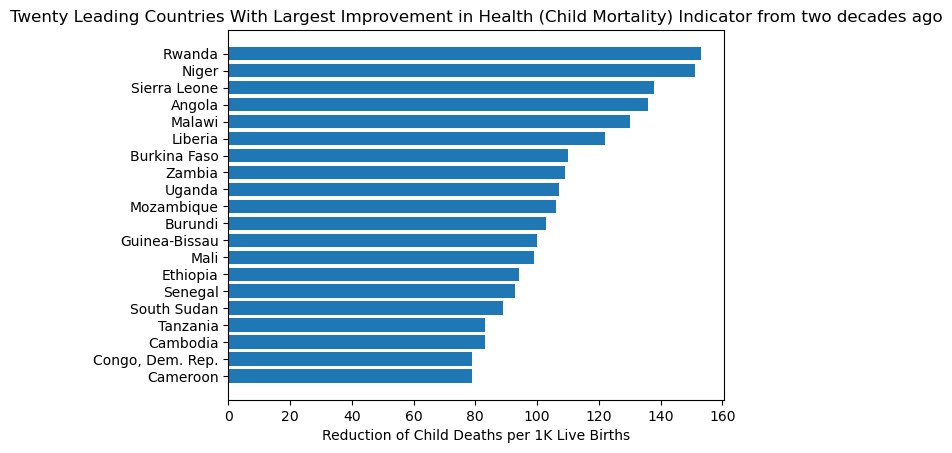

In [187]:
# Plotting the horizontal bar chart with the aid of the 'plot_barh' function
plot_barh(country_col, mortality_change_col, 'Reduction of Child Deaths per 1K Live Births',
          'Twenty Leading Countries With Largest Improvement in Health (Child Mortality) Indicator from two decades ago')

As we can see that the the top twenty leading countries with largest reduction in child mortality rate from two decades ago 
were having from almostly **80** to **150** reduction in child deaths per 1000 live births

**(2) Top 20 Countries Improvement In Education (Literacy Rate) Indicator**

In [188]:
# The last year record
df_literacy.year.max()

Timestamp('2011-01-01 00:00:00')

In [189]:
# Selecting the data record in the year 2000
df_literacy_2000 = df_literacy.query('year == "2000"')

# Renaming the columns labels to the appropriate year
df_literacy_2000.rename(columns={'year' : 'year_2000', 'adult_literacy_rate' : 'adult_literacy_rate_2000'}, inplace=True)

# Selecting the data record in the year 2011 since it is the last record from the data
df_literacy_2011 = df_literacy.query('year == "2011"')

# Renaming the columns labels to the appropriate year
df_literacy_2011.rename(columns={'year' : 'year_2011', 'adult_literacy_rate' : 'adult_literacy_rate_2011'}, inplace=True)

# Merging the two dataframes together on 'country' column
df_literacy_change = df_literacy_2000.merge(df_literacy_2011, left_on='country', right_on='country', how='inner')

# Adding the change column 
df_literacy_change['literacy_change'] = df_literacy_change['adult_literacy_rate_2011'] - df_literacy_change['adult_literacy_rate_2000']
df_literacy_change.head()

<ipython-input-189-fae4cd7552f1>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-189-fae4cd7552f1>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



country  year_2000  adult_literacy_rate_2000  year_2011  \
0    Bosnia and Herzegovina 2000-01-01                      96.7 2011-01-01   
1  Central African Republic 2000-01-01                      50.6 2011-01-01   
2             Cote d'Ivoire 2000-01-01                      48.7 2011-01-01   
3                   Comoros 2000-01-01                      68.5 2011-01-01   
4                Costa Rica 2000-01-01                      94.9 2011-01-01   

   adult_literacy_rate_2011  literacy_change  
0                      98.0              1.3  
1                      56.6              6.0  
2                      56.9              8.2  
3                      75.5              7.0  
4                      96.3              1.4

In [190]:
# Sorting the values descendingly and selecting the first 20 records
df_literacy_change_sorted = df_literacy_change.sort_values(by=['literacy_change'], ascending=False)[0:20]

# Selcting the axis
country_col = df_literacy_change_sorted['country']
literacy_change_col = df_literacy_change_sorted['literacy_change']

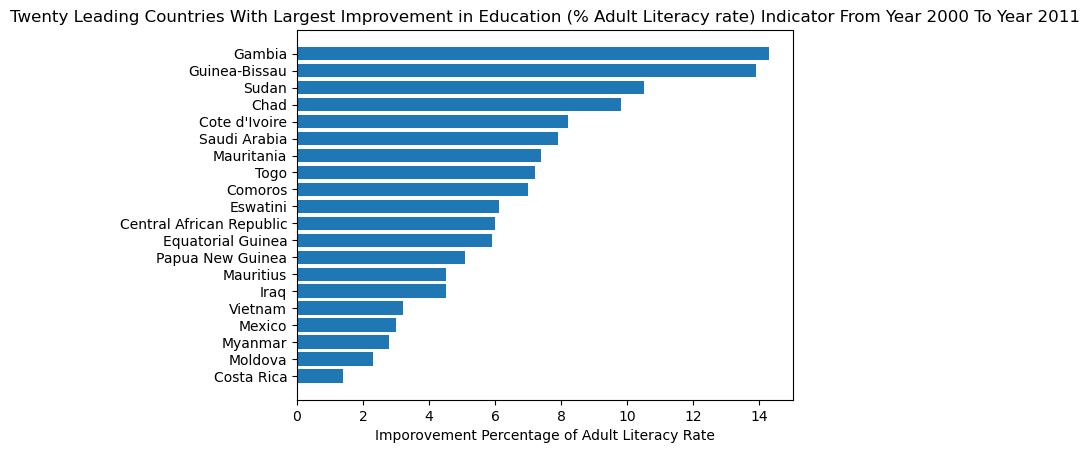

In [191]:
# Plotting the horizontal bar chart with the aid of the 'plot_barh' function
plot_barh(country_col, literacy_change_col, 'Imporovement Percentage of Adult Literacy Rate',
          'Twenty Leading Countries With Largest Improvement in Education (% Adult Literacy rate) Indicator From Year 2000 To Year 2011')

As we can see that the the top twenty leading countries with largest improvement in litercay rate from year 2000 to the year 2011 were having from almostly **1.8%** to **14%** improvement in adult literacy percentage from the population

**(3) Top 20 Countries Improvement In Energy (Energy Use Per Person) Indicator**

In [192]:
# The last year record
df_energy_use.year.max()

Timestamp('2015-01-01 00:00:00')

In [193]:
# Selecting the data record in the year 2000
df_energy_2000 = df_energy_use.query('year == "2000"')

# Renaming the columns labels to the appropriate year
df_energy_2000.rename(columns={'year' : 'year_2000', 'energy/person' : 'energy/person_2000'}, inplace=True)

# Selecting the data record in the year 2014 since it is the last complete record from the data
df_energy_2014 = df_energy_use.query('year == "2014"')

# Renaming the columns labels to the appropriate year
df_energy_2014.rename(columns={'year' : 'year_2014', 'energy/person' : 'energy/person_2014'}, inplace=True)

# Merging the two dataframes together on 'country' column
df_energy_change = df_energy_2000.merge(df_energy_2014, left_on='country', right_on='country', how='inner')

# Adding the change column 
df_energy_change['energy_change'] = df_energy_change['energy/person_2014'] - df_energy_change['energy/person_2000']
df_energy_change.head()

<ipython-input-193-d938aa213a6f>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-193-d938aa213a6f>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



country  year_2000  energy/person_2000  year_2014  \
0                Angola 2000-01-01               439.0 2014-01-01   
1               Albania 2000-01-01               580.0 2014-01-01   
2  United Arab Emirates 2000-01-01             10100.0 2014-01-01   
3             Argentina 2000-01-01              1670.0 2014-01-01   
4               Armenia 2000-01-01               656.0 2014-01-01   

   energy/person_2014  energy_change  
0               545.0          106.0  
1               808.0          228.0  
2              7650.0        -2450.0  
3              2030.0          360.0  
4              1020.0          364.0

In [194]:
# Sorting the values descendingly and selecting the first 20 records
df_energy_change_sorted = df_energy_change.sort_values(by=['energy_change'], ascending=False)[0:20]

# Selcting the axis
country_col = df_energy_change_sorted['country']
energy_change_col = df_energy_change_sorted['energy_change']

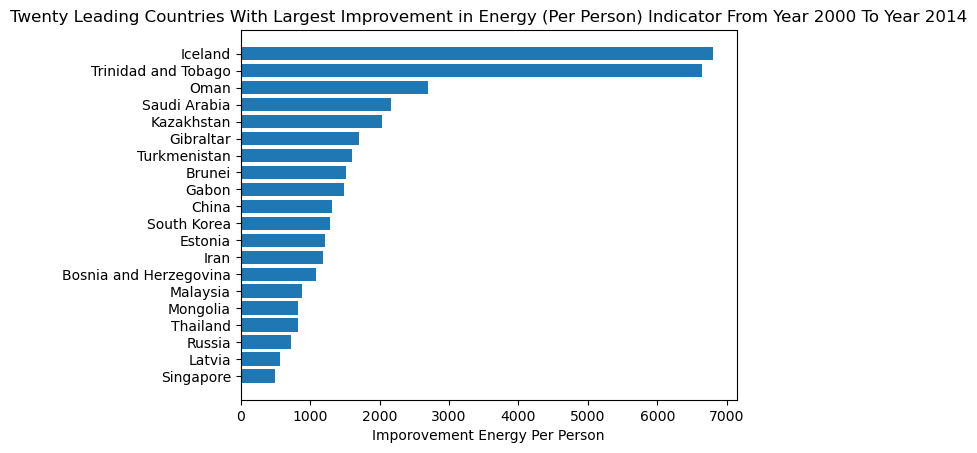

In [195]:
# Plotting the horizontal bar chart with the aid of the 'plot_barh' function
plot_barh(country_col, energy_change_col, 'Imporovement Energy Per Person',
          'Twenty Leading Countries With Largest Improvement in Energy (Per Person) Indicator From Year 2000 To Year 2014')

As we can see that the the top twenty leading countries with largest improvement in energy use from year 2000 to the year 2014 were having from almostly **500 KG** to **6900 KG** imrovement of oil equivelant per person

**(3) Top 20 Countries Improvement In GDP Indicator**

In [196]:
# The last year record
df_gdp.year.max()

Timestamp('2050-01-01 00:00:00')

In [197]:
# Selecting the data record in the year 2000
df_gdp_2000 = df_gdp.query('year == "2000"')

# Renaming the columns labels to the appropriate year
df_gdp_2000.rename(columns={'year' : 'year_2000', 'gdp/person' : 'gdp/person_2000'}, inplace=True)

# Selecting the data record in the year 2021 
df_gdp_2021 = df_gdp.query('year == "2021"')

# Renaming the columns labels to the appropriate year
df_gdp_2021.rename(columns={'year' : 'year_2021', 'gdp/person' : 'gdp/person_2021'}, inplace=True)

# Merging the two dataframes together on 'country' column
df_gdp_change = df_gdp_2000.merge(df_gdp_2021, left_on='country', right_on='country', how='inner')

# Adding the change column 
df_gdp_change['gdp_change'] = df_gdp_change['gdp/person_2021'] - df_gdp_change['gdp/person_2000']
df_gdp_change.head()

<ipython-input-197-9ad7da858624>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-197-9ad7da858624>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



country  year_2000  gdp/person_2000  year_2021  \
0           Afghanistan 2000-01-01            584.0 2021-01-01   
1                Angola 2000-01-01           2340.0 2021-01-01   
2               Albania 2000-01-01           5890.0 2021-01-01   
3               Andorra 2000-01-01          35800.0 2021-01-01   
4  United Arab Emirates 2000-01-01          71600.0 2021-01-01   

   gdp/person_2021  gdp_change  
0           1950.0      1366.0  
1           5980.0      3640.0  
2          14300.0      8410.0  
3          55100.0     19300.0  
4          65100.0     -6500.0

In [198]:
# Sorting the values descendingly and selecting the first 20 records
df_gdp_change_sorted = df_gdp_change.sort_values(by=['gdp_change'], ascending=False)[0:20]

# Selcting the axis
country_col = df_gdp_change_sorted['country']
gdp_change_col = df_gdp_change_sorted['gdp_change']

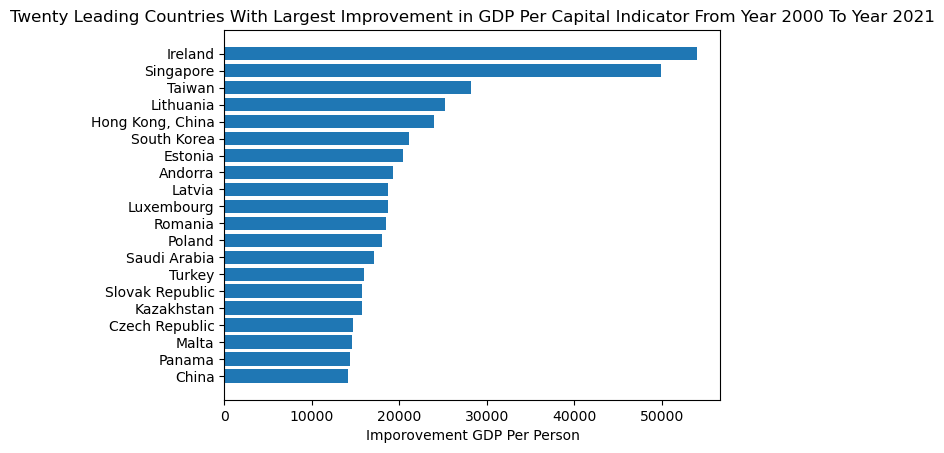

In [199]:
# Plotting the horizontal bar chart with the aid of the 'plot_barh' function
plot_barh(country_col, gdp_change_col, 'Imporovement GDP Per Person',
          'Twenty Leading Countries With Largest Improvement in GDP Per Capital Indicator From Year 2000 To Year 2021')

As we can see that the the top twenty leading countries with largest improvement GDP from year 2000 to the year 2021 were having from almostly **15,000 dollar** to **55,000 dollar** imrovement per person

**(5) Top 20 Countries Improvement In Hunger and Undernourishment Indicator**

In [200]:
# The last year record
df_undernourishment.year.min(), df_undernourishment.year.max()

(Timestamp('2001-01-01 00:00:00'), Timestamp('2019-01-01 00:00:00'))

In [201]:
# Selecting the data record in the year 2001 since its the first data record
df_undernourishment_2001 = df_undernourishment.query('year == "2001"')

# Renaming the columns labels to the appropriate year
df_undernourishment_2001.rename(columns={'year' : 'year_2001', 'undernourishment_rate' : 'undernourishment_rate_2001'}, inplace=True)

# Selecting the data record in the year 2019 since its the last data record 
df_undernourishment_2019 = df_undernourishment.query('year == "2019"')

# Renaming the columns labels to the appropriate year
df_undernourishment_2019.rename(columns={'year' : 'year_2019', 'undernourishment_rate' : 'undernourishment_rate_2019'}, inplace=True)

# Merging the two dataframes together on 'country' column
df_undernourishment_change = df_undernourishment_2001.merge(df_undernourishment_2019, left_on='country', right_on='country', how='inner')

# Adding the change column 
df_undernourishment_change['undernourishment_change'] = df_undernourishment_change['undernourishment_rate_2001'] - df_undernourishment_change['undernourishment_rate_2019']
df_undernourishment_change.head()

<ipython-input-201-dd0d0acd6dc8>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-201-dd0d0acd6dc8>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



country  year_2001  undernourishment_rate_2001  year_2019  \
0           Afghanistan 2001-01-01                        47.8 2019-01-01   
1                Angola 2001-01-01                        67.5 2019-01-01   
2               Albania 2001-01-01                         4.9 2019-01-01   
3  United Arab Emirates 2001-01-01                         3.3 2019-01-01   
4             Argentina 2001-01-01                         3.0 2019-01-01   

   undernourishment_rate_2019  undernourishment_change  
0                        25.6                     22.2  
1                        17.3                     50.2  
2                         3.9                      1.0  
3                         3.7                     -0.4  
4                         3.9                     -0.9

In [202]:
# Sorting the values descendingly and selecting the first 20 records
df_undernourishment_change_sorted = df_undernourishment_change.sort_values(by=['undernourishment_change'], ascending=False)[0:20]

# Selcting the axis
country_col = df_undernourishment_change_sorted['country']
undernourishment_change_col = df_undernourishment_change_sorted['undernourishment_change']

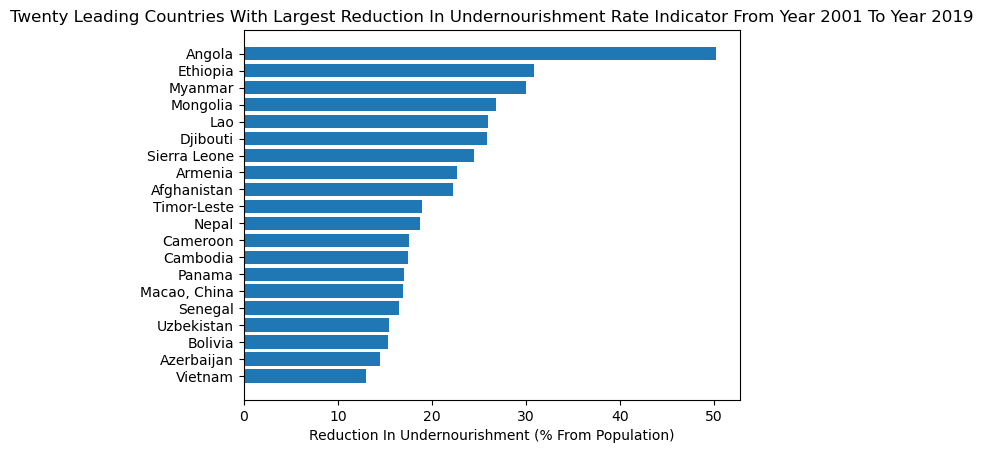

In [203]:
# Plotting the horizontal bar chart with the aid of the 'plot_barh' function
plot_barh(country_col, undernourishment_change_col, 'Reduction In Undernourishment (% From Population)',
          'Twenty Leading Countries With Largest Reduction In Undernourishment Rate Indicator From Year 2001 To Year 2019')

As we can see that the the top twenty leading countries with largest reduction in undernourishment rate from year 2001 to the year 2019 were having from almostly **13%** to **50%** reduction from the total population with the county angola at the top

**(6) Top 20 Countries Improvement In CO2 Emissions Indicator**

In [204]:
# The last year record
df_co2.year.min(), df_co2.year.max()

(Timestamp('1800-01-01 00:00:00'), Timestamp('2018-01-01 00:00:00'))

In [205]:
# Selecting the data record in the year 2000
df_co2_2000 = df_co2.query('year == "2000"')

# Renaming the columns labels to the appropriate year
df_co2_2000.rename(columns={'year' : 'year_2000', 'tonnes_co2/person' : 'tonnes_co2/person_2000'}, inplace=True)

# Selecting the data record in the year 2018 since its the last data record 
df_co2_2018 = df_co2.query('year == "2018"')

# Renaming the columns labels to the appropriate year
df_co2_2018.rename(columns={'year' : 'year_2018', 'tonnes_co2/person' : 'tonnes_co2/person_2018'}, inplace=True)

# Merging the two dataframes together on 'country' column
df_co2_change = df_co2_2000.merge(df_co2_2018, left_on='country', right_on='country', how='inner')

# Adding the change column 
df_co2_change['co2_change'] = df_co2_change['tonnes_co2/person_2000'] - df_co2_change['tonnes_co2/person_2018']
df_co2_change.head()

<ipython-input-205-9eeb71aa6d99>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-205-9eeb71aa6d99>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



country  year_2000  tonnes_co2/person_2000  year_2018  \
0           Afghanistan 2000-01-01                   0.037 2018-01-01   
1                Angola 2000-01-01                   0.581 2018-01-01   
2               Albania 2000-01-01                   0.966 2018-01-01   
3               Andorra 2000-01-01                   8.020 2018-01-01   
4  United Arab Emirates 2000-01-01                  35.700 2018-01-01   

   tonnes_co2/person_2018  co2_change  
0                   0.254      -0.217  
1                   1.120      -0.539  
2                   1.590      -0.624  
3                   6.120       1.900  
4                  21.400      14.300

In [206]:
# Sorting the values descendingly and selecting the first 20 records
df_co2_change_sorted = df_co2_change.sort_values(by=['co2_change'], ascending=False)[0:20]

# Selcting the axis
country_col = df_co2_change_sorted['country']
co2_change_col = df_co2_change_sorted['co2_change']

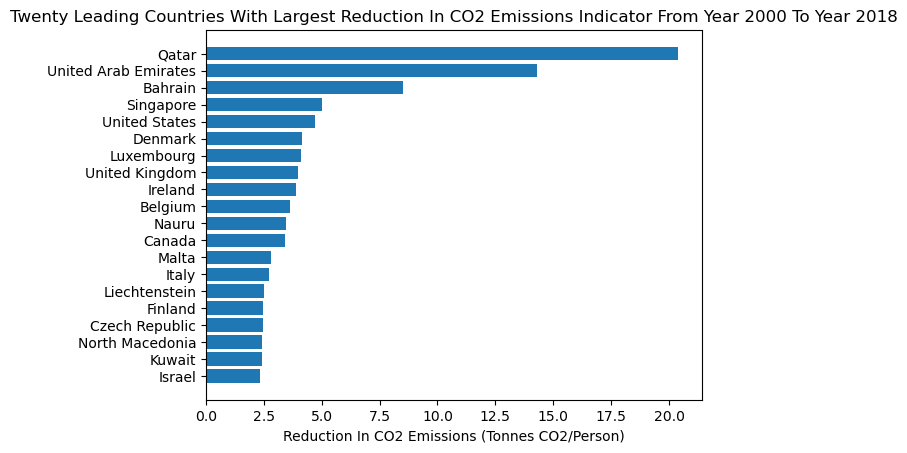

In [207]:
# Plotting the horizontal bar chart with the aid of the 'plot_barh' function
plot_barh(country_col, co2_change_col, 'Reduction In CO2 Emissions (Tonnes CO2/Person)',
          'Twenty Leading Countries With Largest Reduction In CO2 Emissions Indicator From Year 2000 To Year 2018')

As we can see that the the top twenty leading countries with largest reduction in CO2 emissions from year 2000 to the year 2018 were having from almostly **2.5** to **20** Tonnes CO2 reduction per person

### 3.5 Research Question 5: What are the characteristics of a great country across different indicators?

>**(1) Health Indicator**

*merging all the data sets to get the characteristics of great countries in health across all the indicators*

In [208]:
# Merging all the data in one master dataframe
df_master = df_undernourishment.merge(df_child_mortality, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')\
            .merge(df_literacy, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')\
            .merge(df_gdp, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')\
            .merge(df_poverty, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')\
            .merge(df_population, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')\
            .merge(df_fertility, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')\
            .merge(df_energy_use, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')\
            .merge(df_co2, left_on=['country', 'year'], right_on=['country', 'year'], how='inner')

In [209]:
# Preview the data
df_master.head()

country       year  undernourishment_rate  child_death/1k  \
0  Argentina 2001-01-01                    3.0              18   
1    Armenia 2001-01-01                   26.1              29   
2    Bolivia 2001-01-01                   27.9              71   
3   Honduras 2001-01-01                   21.9              35   
4  Nicaragua 2001-01-01                   27.5              34   

   adult_literacy_rate  gdp/person  poverty_ratio  total_population  \
0                 97.2     17600.0           19.2        37300000.0   
1                 99.4      4460.0           47.4         3050000.0   
2                 86.7      5400.0           36.1         8580000.0   
3                 80.0      4110.0           36.0         6750000.0   
4                 76.7      4030.0           38.2         5150000.0   

   total_births/woman  energy/person  tonnes_co2/person  
0                2.51         1570.0              3.580  
1                1.63          657.0              1.160  
2                3.97          445.0              0.999  
3                4.10          478.0              0.831  
4                3.02          493.0              0.763

In [210]:
# Checking the median of child mortality in our data sets
df_master['child_death/1k'].median()

20.0

In [211]:
# Getting the top countries' data for the health indicator (low child mortality)  
df_top_health = df_master[df_master['child_death/1k'] < df_master['child_death/1k'].median()]
df_top_health.head()

country       year  undernourishment_rate  child_death/1k  \
0   Argentina 2001-01-01                    3.0              18   
9      Russia 2002-01-01                    3.3              17   
15    Hungary 2004-01-01                    2.5               7   
19     Poland 2004-01-01                    2.5               7   
21   Slovenia 2004-01-01                    2.5               4   

    adult_literacy_rate  gdp/person  poverty_ratio  total_population  \
0                  97.2     17600.0           19.2        37300000.0   
9                  99.4     16200.0            6.6       145000000.0   
15                 99.0     23400.0            0.3        10100000.0   
19                 99.6     18300.0            4.5        38400000.0   
21                 99.7     30000.0            0.2         1990000.0   

    total_births/woman  energy/person  tonnes_co2/person  
0                 2.51         1570.0               3.58  
9                 1.29         4290.0              10.30  
15                1.28         2580.0               5.98  
19                1.23         2380.0               8.43  
21                1.25         3570.0               8.37

In [212]:
df_top_health.describe()

undernourishment_rate  child_death/1k  adult_literacy_rate  \
count              58.000000       58.000000            58.000000   
mean                4.696552       11.172414            96.029310   
std                 3.681817        5.879306             4.282851   
min                 2.500000        3.000000            79.100000   
25%                 2.500000        5.000000            93.450000   
50%                 2.500000       11.000000            97.800000   
75%                 4.475000       17.000000            99.000000   
max                16.000000       19.000000            99.800000   

         gdp/person  poverty_ratio  total_population  total_births/woman  \
count     58.000000      58.000000      5.800000e+01           58.000000   
mean   20385.862069       7.479310      5.698328e+07            1.798276   
std     9297.625434       8.028846      1.803161e+08            0.431526   
min     7330.000000       0.000000      1.120000e+06            1.230000   
25%    12600.000000       1.100000      3.645000e+06            1.410000   
50%    18350.000000       4.000000      1.510000e+07            1.685000   
75%    24900.000000      12.900000      4.567500e+07            2.125000   
max    42900.000000      28.600000      1.370000e+09            2.640000   

       energy/person  tonnes_co2/person  
count      58.000000          58.000000  
mean     1900.706897           4.779638  
std      1028.808799           2.912139  
min       461.000000           0.599000  
25%       973.000000           2.355000  
50%      1725.000000           4.440000  
75%      2610.000000           6.712500  
max      4820.000000          14.400000

**As seen from the above table that the countries with low child mortality rate or having a good overall health system having:**

* on average low undernourishment rate by **4.7%** of population
* on average high literacy rate by **96%** of adults
* on average high gdp/person by **20385.9** dollar
* on average low poverty ratio by **7.5%** of population 
* for about average **57 Million** total population
* on average low fertility rate by **2** births/woman
* on average energy use about **1900.7 Kg** Of Oil Equivalent Per Person
* on average CO2 emissions **4.77** tonnes_co2/person

>**(2) CO2 Emissions Indicator**

In [213]:
# Preview the data
df_master.head()

country       year  undernourishment_rate  child_death/1k  \
0  Argentina 2001-01-01                    3.0              18   
1    Armenia 2001-01-01                   26.1              29   
2    Bolivia 2001-01-01                   27.9              71   
3   Honduras 2001-01-01                   21.9              35   
4  Nicaragua 2001-01-01                   27.5              34   

   adult_literacy_rate  gdp/person  poverty_ratio  total_population  \
0                 97.2     17600.0           19.2        37300000.0   
1                 99.4      4460.0           47.4         3050000.0   
2                 86.7      5400.0           36.1         8580000.0   
3                 80.0      4110.0           36.0         6750000.0   
4                 76.7      4030.0           38.2         5150000.0   

   total_births/woman  energy/person  tonnes_co2/person  
0                2.51         1570.0              3.580  
1                1.63          657.0              1.160  
2                3.97          445.0              0.999  
3                4.10          478.0              0.831  
4                3.02          493.0              0.763

In [214]:
# Checking the median of CO2 Emissions
df_master['tonnes_co2/person'].median()

2.17

In [215]:
# Getting the top countries' data for the Lower CO2 emissions 
df_low_CO2 = df_master[df_master['tonnes_co2/person'] < df_master['tonnes_co2/person'].median()]
df_low_CO2.head()

country       year  undernourishment_rate  child_death/1k  \
1    Armenia 2001-01-01                   26.1              29   
2    Bolivia 2001-01-01                   27.9              71   
3   Honduras 2001-01-01                   21.9              35   
4  Nicaragua 2001-01-01                   27.5              34   
7    Georgia 2002-01-01                    5.9              31   

   adult_literacy_rate  gdp/person  poverty_ratio  total_population  \
1                 99.4      4460.0           47.4         3050000.0   
2                 86.7      5400.0           36.1         8580000.0   
3                 80.0      4110.0           36.0         6750000.0   
4                 76.7      4030.0           38.2         5150000.0   
7                 99.7      5570.0           29.9         4260000.0   

   total_births/woman  energy/person  tonnes_co2/person  
1                1.63          657.0              1.160  
2                3.97          445.0              0.999  
3                4.10          478.0              0.831  
4                3.02          493.0              0.763  
7                1.59          639.0              0.788

In [216]:
df_low_CO2.describe()

undernourishment_rate  child_death/1k  adult_literacy_rate  \
count              61.000000       61.000000            61.000000   
mean               13.998361       36.278689            85.921311   
std                 7.911879       30.232505            13.612018   
min                 2.500000        9.000000            35.900000   
25%                 8.700000       20.000000            84.000000   
50%                12.200000       26.000000            90.300000   
75%                19.000000       35.000000            93.400000   
max                39.000000      167.000000            99.700000   

         gdp/person  poverty_ratio  total_population  total_births/woman  \
count     61.000000      61.000000      6.100000e+01           61.000000   
mean    8109.393443      30.377049      7.269689e+07            2.813115   
std     4033.722984      20.848744      1.716008e+08            1.067478   
min      793.000000       1.300000      1.040000e+06            1.590000   
25%     4910.000000      16.000000      6.020000e+06            2.050000   
50%     7390.000000      23.900000      9.560000e+06            2.510000   
75%    10400.000000      36.100000      4.570000e+07            2.960000   
max    19300.000000      81.400000      1.250000e+09            6.040000   

       energy/person  tonnes_co2/person  
count      61.000000          61.000000  
mean      698.309836           1.230598  
std       240.252678           0.508340  
min        58.900000           0.069500  
25%       526.000000           0.841000  
50%       684.000000           1.220000  
75%       791.000000           1.670000  
max      1290.000000           2.120000

**As seen from the above table that the countries with low CO2 emissions having:**

* on average undernourishment rate by **14%** of population
* on average child mortality rate by **36** child death/1k live births
* on average literacy rate by **86%** of adults
* on average gdp/person by **8109.4** dollar
* on average poverty ratio by **30.4%** of population 
* for about average **73 Million** total population
* on average fertility rate by **3** births/woman
* on average low energy use about **698.3 Kg** Of Oil Equivalent Per Person

>**(3) GDP per capital Indicator**

In [217]:
# Preview the data
df_master.head()

country       year  undernourishment_rate  child_death/1k  \
0  Argentina 2001-01-01                    3.0              18   
1    Armenia 2001-01-01                   26.1              29   
2    Bolivia 2001-01-01                   27.9              71   
3   Honduras 2001-01-01                   21.9              35   
4  Nicaragua 2001-01-01                   27.5              34   

   adult_literacy_rate  gdp/person  poverty_ratio  total_population  \
0                 97.2     17600.0           19.2        37300000.0   
1                 99.4      4460.0           47.4         3050000.0   
2                 86.7      5400.0           36.1         8580000.0   
3                 80.0      4110.0           36.0         6750000.0   
4                 76.7      4030.0           38.2         5150000.0   

   total_births/woman  energy/person  tonnes_co2/person  
0                2.51         1570.0              3.580  
1                1.63          657.0              1.160  
2                3.97          445.0              0.999  
3                4.10          478.0              0.831  
4                3.02          493.0              0.763

In [218]:
# Checking the median of GDP/person 
df_master['gdp/person'].median()

11800.0

In [219]:
# Getting the top countries' data for the high GDP/person
df_high_gdp = df_master[df_master['gdp/person'] > df_master['gdp/person'].median()]
df_high_gdp.head()

country       year  undernourishment_rate  child_death/1k  \
0   Argentina 2001-01-01                    3.0              18   
5   Venezuela 2001-01-01                   14.9              20   
8      Mexico 2002-01-01                    3.7              23   
9      Russia 2002-01-01                    3.3              17   
12     Brazil 2004-01-01                    6.8              26   

    adult_literacy_rate  gdp/person  poverty_ratio  total_population  \
0                  97.2     17600.0           19.2        37300000.0   
5                  93.0     16600.0           22.1        24600000.0   
8                  90.3     17200.0           18.8       102000000.0   
9                  99.4     16200.0            6.6       145000000.0   
12                 88.6     12300.0           21.4       184000000.0   

    total_births/woman  energy/person  tonnes_co2/person  
0                 2.51         1570.0               3.58  
5                 2.78         2150.0               6.98  
8                 2.62         1530.0               4.05  
9                 1.29         4290.0              10.30  
12                2.03         1140.0               1.81

In [220]:
df_high_gdp.describe()

undernourishment_rate  child_death/1k  adult_literacy_rate  \
count              61.000000       61.000000            61.000000   
mean                4.068852       13.606557            95.080328   
std                 2.755210        8.335224             4.632308   
min                 2.500000        3.000000            82.300000   
25%                 2.500000        5.000000            91.000000   
50%                 2.500000       12.000000            97.600000   
75%                 4.400000       20.000000            98.900000   
max                14.900000       34.000000            99.800000   

         gdp/person  poverty_ratio  total_population  total_births/woman  \
count     61.000000      61.000000      6.100000e+01           61.000000   
mean   21429.508197       6.642623      5.322033e+07            1.864262   
std     8031.611384       6.440224      5.613783e+07            0.454842   
min    12000.000000       0.000000      1.120000e+06            1.230000   
25%    16200.000000       1.300000      7.380000e+06            1.440000   
50%    18700.000000       4.000000      4.130000e+07            1.870000   
75%    24600.000000      12.400000      7.130000e+07            2.240000   
max    42900.000000      22.100000      1.940000e+08            2.780000   

       energy/person  tonnes_co2/person  
count      61.000000          61.000000  
mean     2045.573770           5.206393  
std       952.168411           2.850599  
min       684.000000           1.560000  
25%      1240.000000           3.580000  
50%      1750.000000           4.490000  
75%      2620.000000           6.950000  
max      4820.000000          14.400000

**As seen from the above table that the countries with high GDP/person having:**

* on average low undernourishment rate by **4%** of population
* on average low child mortality rate by **14** child death/1k live births
* on average high literacy rate by **95%** of adults
* on average low poverty ratio by **6.6%** of population 
* for about average **53 Million** total population
* on average low fertility rate by **2** births/woman
* on average energy use about **2045.6 Kg** Of Oil Equivalent Per Person
* on average CO2 emissions **5.2** tonnes_co2/person

### 3.6 Research Question 6: What is the status of Egypt from two decades ago till now?

**1) The Status of GDP In Egypt since 20 Years Ago** 

In [221]:
# Checking the data record since 20 years ago
df_gdp.year.min(), df_gdp.year.max()

(Timestamp('1800-01-01 00:00:00'), Timestamp('2050-01-01 00:00:00'))

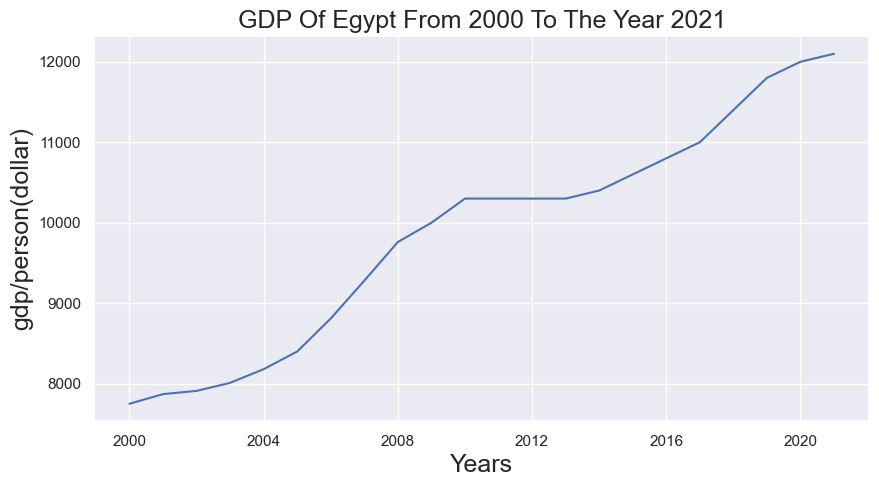

In [222]:
# Selecting the data of the country Egypt
df_gdp_egypt = df_gdp.query('country == "Egypt"')

# Selecting the range of years
mask = (df_gdp_egypt['year'] >= '2000') & (df_gdp_egypt['year'] <= '2021')
df_gdp_egypt_year = df_gdp_egypt[mask]

# Selecting the axes
years = df_gdp_egypt_year['year']
gdp = df_gdp_egypt_year['gdp/person']

# Ploting
sns.set_theme(style='darkgrid')
plt.subplots(figsize=(10, 5))
plt.plot(years, gdp)
plt.title("GDP Of Egypt From 2000 To The Year 2021", fontsize=18)
plt.xlabel("Years", fontsize=18)
plt.ylabel("gdp/person(dollar)", fontsize=18)

plt.show()

As we can see that the GDP per capital in Egypt is Increasingly from 2000 till the year 2021 which starts at **7750 dollar** and ends at **12100 dollar** per person 

**2) The Status of Education (Literacy Rate) In Egypt From 1991 To The Year 2011** 

In [223]:
# Checking the data record since 20 years ago
df_literacy.year.min(), df_literacy.year.max()

(Timestamp('1975-01-01 00:00:00'), Timestamp('2011-01-01 00:00:00'))

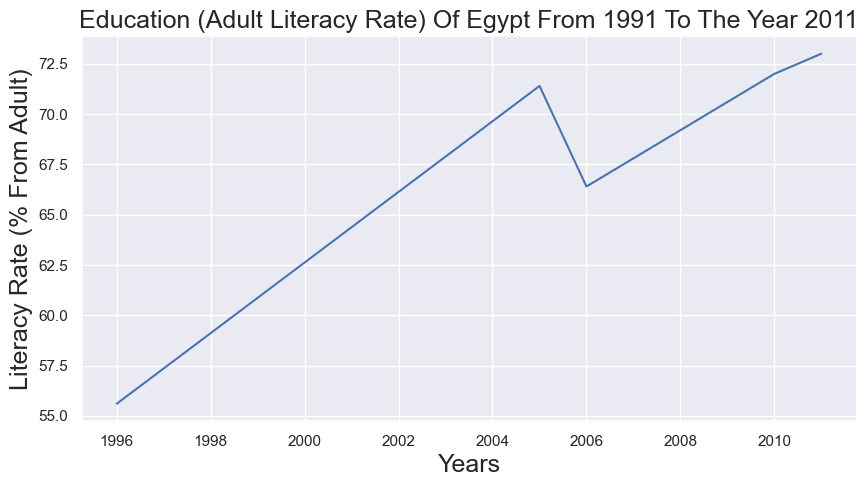

In [224]:
# Selecting the data of the country Egypt
df_literacy_egypt = df_literacy.query('country == "Egypt"')

# Selecting the range of years
mask = (df_literacy_egypt['year'] >= '1991') & (df_literacy_egypt['year'] <= '2011')
df_literacy_egypt_year = df_literacy_egypt[mask]

# Selecting the axes
years = df_literacy_egypt_year['year']
literacy = df_literacy_egypt_year['adult_literacy_rate']

plt.subplots(figsize=(10, 5))
plt.plot(years, literacy)
plt.title("Education (Adult Literacy Rate) Of Egypt From 1991 To The Year 2011", fontsize=18)
plt.xlabel("Years", fontsize=18)
plt.ylabel("Literacy Rate (% From Adult)", fontsize=18)

plt.show()

As we can see that Adult Literacy Rate in Egypt is Increasingly from 1996 till the year 2011 with a drop from 2005 to the year 2006 which starts at **55.6%** and ends at **73%** from all the adults above age 15

**3) The Status Of Health (Child Mortality) In Egypt Since 20 Years Ago** 

In [225]:
# Checking the data record since 20 years ago
df_child_mortality.year.min(), df_child_mortality.year.max()

(Timestamp('1950-01-01 00:00:00'), Timestamp('2100-01-01 00:00:00'))

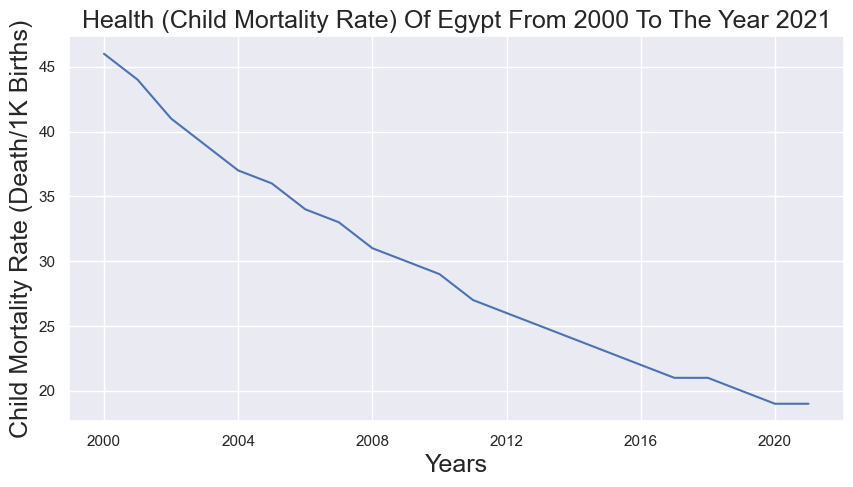

In [226]:
# Selecting the data of the country Egypt
df_child_mortality_egypt = df_child_mortality.query('country == "Egypt"')

# Selecting the range of years
mask = (df_child_mortality_egypt['year'] >= '2000') & (df_child_mortality_egypt['year'] <= '2021')
df_child_mortality_egypt_year = df_child_mortality_egypt[mask]

# Selecting the axes
years = df_child_mortality_egypt_year['year']
mortality = df_child_mortality_egypt_year['child_death/1k']

plt.subplots(figsize=(10, 5))
plt.plot(years, mortality)
plt.title("Health (Child Mortality Rate) Of Egypt From 2000 To The Year 2021", fontsize=18)
plt.xlabel("Years", fontsize=18)
plt.ylabel("Child Mortality Rate (Death/1K Births)", fontsize=18)

plt.show()

As we can see that Child Mortality Rate in Egypt is Decreasing from 2000 till the year 2021 which starts at **46** and ends at **19** child deaths per 1000 live births

**4) The Status Of Hunger And Undernourishment In Egypt From 2001 To The Year 2019** 

In [227]:
# Checking the data record since 20 years ago
df_undernourishment.year.min(), df_undernourishment.year.max()

(Timestamp('2001-01-01 00:00:00'), Timestamp('2019-01-01 00:00:00'))

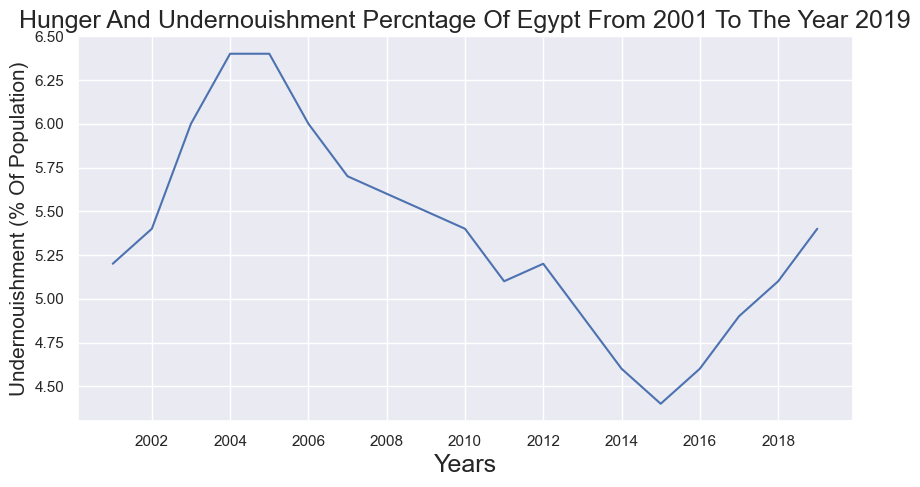

In [228]:
# Selecting the data of the country Egypt
df_undernourishment_egypt = df_undernourishment.query('country == "Egypt"')

# Selecting the range of years
mask = (df_undernourishment_egypt['year'] >= '2001') & (df_undernourishment_egypt['year'] <= '2019')
df_undernourishment_egypt_year = df_undernourishment_egypt[mask]

# Selecting the axes
years = df_undernourishment_egypt_year['year']
undernourishment = df_undernourishment_egypt_year['undernourishment_rate']

plt.subplots(figsize=(10, 5))
plt.plot(years, undernourishment)
plt.title("Hunger And Undernouishment Percntage Of Egypt From 2001 To The Year 2019", fontsize=18)
plt.xlabel("Years", fontsize=18)
plt.ylabel("Undernouishment (% Of Population)", fontsize=15)

plt.show()

As we can see that Hunger and Undernourishment Rate in Egypt is increased from 2001 to the year 2004 then decreased from 2005 till the year 2015 and now increasingly from 2015 till the year 2019 which starts at **5.2%** and ends at **5.4%** of population

**5) The Status Of Extreme Poverty In Egypt From 1990 To The Year 2017** 

In [229]:
# Checking the data record since 20 years ago
df_poverty.query('country == "Egypt"').year.min(), df_poverty.query('country == "Egypt"').year.max()

(Timestamp('1990-01-01 00:00:00'), Timestamp('2017-01-01 00:00:00'))

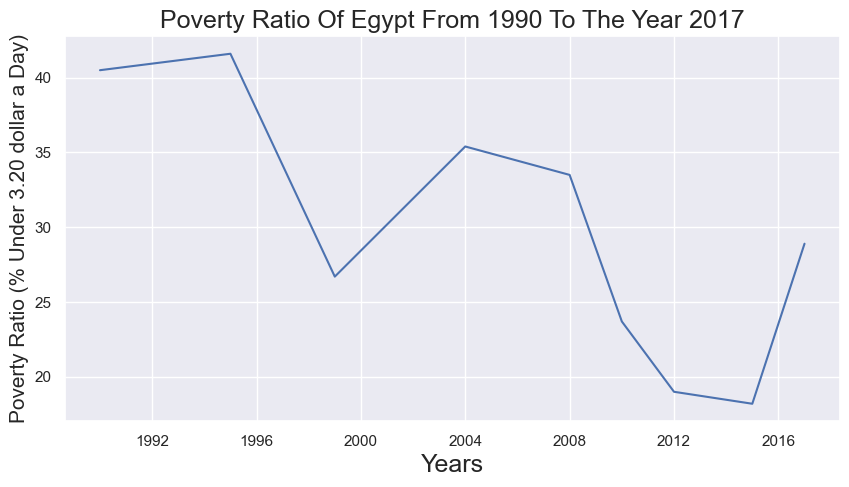

In [230]:
# Selecting the data of the country Egypt
df_poverty_egypt = df_poverty.query('country == "Egypt"')

# Selecting the range of years
mask = (df_poverty_egypt['year'] >= '1990') & (df_poverty_egypt['year'] <= '2017')
df_poverty_egypt_year = df_poverty_egypt[mask]

# Selecting the axes
years = df_poverty_egypt_year['year']
poverty = df_poverty_egypt_year['poverty_ratio']

plt.subplots(figsize=(10, 5))
plt.plot(years, poverty)
plt.title("Poverty Ratio Of Egypt From 1990 To The Year 2017", fontsize=18)
plt.xlabel("Years", fontsize=18)
plt.ylabel("Poverty Ratio (% Under 3.20 dollar a Day)", fontsize=15)

plt.show()

As we can see that Poverty Ratio in Egypt is decreased from 1995 to the year 1999, then increased from 1999 to the year 2004, then decreased from 2004 till the year 2015 and now increasingly from 2015 till the year 2017 which starts at **40.5%** and ends at **28.9%** of population under 3.20 dollar a day

**6) The Status Of Energy (Per Person) In Egypt From 1990 To The Year 2014** 

In [231]:
# Checking the data record since 20 years ago
df_energy_use.query('country == "Egypt"').year.min(), df_energy_use.query('country == "Egypt"').year.max()

(Timestamp('1971-01-01 00:00:00'), Timestamp('2014-01-01 00:00:00'))

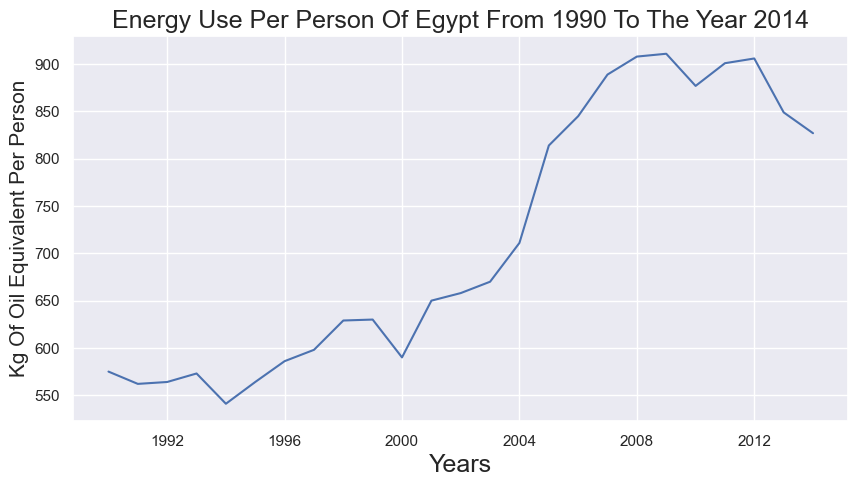

In [232]:
# Selecting the data of the country Egypt
df_energy_use_egypt = df_energy_use.query('country == "Egypt"')

# Selecting the range of years
mask = (df_energy_use_egypt['year'] >= '1990') & (df_energy_use_egypt['year'] <= '2014')
df_energy_use_egypt_year = df_energy_use_egypt[mask]

# Selecting the axes
years = df_energy_use_egypt_year['year']
energy = df_energy_use_egypt_year['energy/person']

plt.subplots(figsize=(10, 5))
plt.plot(years, energy)
plt.title("Energy Use Per Person Of Egypt From 1990 To The Year 2014", fontsize=18)
plt.xlabel("Years", fontsize=18)
plt.ylabel("Kg Of Oil Equivalent Per Person", fontsize=15)

plt.show()

As we can see that Energy Use in Egypt is increased from 1990 till the year 2012 with a drop in 1994, 2000 and 2010, and now is decreasingly from 2012 till the year 2014 which starts at **575 KG** and ends at **827 KG** of oil equivalent per person

## 4. Conclusions

### 4.1 The Top Five Leading Countries in:
* **Minimum Hunger and Undernourishment Rate In The Year 2019:**    
1) South Korea      
2) Czech Republic          
3) Germany          
4) Denmark           
5) Algeria          


* **Minimum Child Mortality Rate In The Year 2021:**            
1) Finland             
2) Hon Kong (China)         
3) Iceland        
4) San Marino         
5) Luxembourg      


* **Largest Adults Literacy Rate In The Year 2011:**            
1) Cuba             
2) Latvia         
3) Estonia        
4) Ukraine         
5) Tajikistan      


* **Largest GDP Per Capital In The Year 2021:**            
1) Luxembourg             
2) Singapore         
3) Ireland        
4) Qatar         
5) Monaco      


* **Minimum Poverty Rate In The Year 2020:**            
1) Belarus             
2) Ukraine         
3) Thailand        
4) Russia         
5) Uruguay         


* **Largest Population In The Year 2021:**            
1) China             
2) India         
3) United States        
4) Indonesia         
5) Pakistan     


* **Largest Fertility Rate In The Year 2020:**            
1) Niger             
2) Somalia         
3) Cong, Dem. Rep.        
4) Mali         
5) Chad   


* **Largest Fertility Rate In The Year 2020:**            
1) Niger             
2) Somalia         
3) Cong, Dem. Rep.        
4) Mali         
5) Chad         


* **Largest Energy Use Per Person In The Year 2014:**            
1) Qatar             
2) Iceland         
3) Trinidad and Tobago        
4) Curacao         
5) Bahrain  


* **Minimum CO2 Emissions In The Year 2018:**            
1) Congo, Dem. Rep.             
2) Somalia         
3) Burundi        
4) Central African Republic         
5) Chad         

### 4.2 The Relations Between Indicators:

>**From the above analysis we can conclude that there is strong negative correlations between the education (adult literacy rate) with {child mortality, Extreme Poverty and Fertility Rate (total births/woman)}**


>**Also we can conclude that there is strong positive correlations between the Health (child mortality) with {Fertility Rate (total births/woman) and Extreme Poverty}**


>**Also we can conclude that there is strong positive correlations between Energy Use per person with {GDP/person and CO2 Emissions}**


>**From all this investigation we can conclude that there are three main indicators affecting others and can make a significant Impact in our world which is:**
>* **Education (Adult Literacy Rate)**
>* **Health (Child Mortality)**
>* **Energy (Use per Person)**

### 4.3 The Top Five Leading Countries In Making a Significant Improvement:

* **Greatest Reduction In Child Mortality Rate From Two Decades Ago:**    
1) Rwanda      
2) Niger          
3) Sierra Leone          
4) Angola           
5) Malawi          


* **Greatest Improvement In Literacy Rate From 2000 To The Year 2011:**            
1) Gambia             
2) Guinea         
3) Sudan        
4) Chad         
5) Cote d'lvoire      


* **Greatest Imporovement In Energy Use Per Person From 2000 To The Year 2014:**            
1) Iceland             
2) Trinidad and Tobago         
3) Oman        
4) Saudi Arabia         
5) Kazakhstan      


* **Greatest Improvement In GDP Per Capital From Two Decades Ago:**            
1) Ireland             
2) Singapore         
3) Taiwan        
4) Lithuania         
5) Hon Kong (China)     


* **Greatest Reduction In Hunger and Undernourishment Rate From 2001 To The Year 2019:**            
1) Angola             
2) Ethiopia         
3) Myanmar        
4) Mongolia         
5) Lao      


* **Greatest Reduction In CO2 Emissions From 2000 To The Year 2018:**            
1) Qatar             
2) United Arab Emirates         
3) Bahrain        
4) Singapore         
5) United States    



### 4.4 The Characteristics Of Great Countries:

**We can conclude That the countries with low child mortality rate or having a good overall health system having:**      


* on average low undernourishment rate by **4.7%** of population
* on average high literacy rate by **96%** of adults
* on average high gdp/person by **20385.9** dollar
* on average low poverty ratio by **7.5%** of population 
* for about average **57 Million** total population
* on average low fertility rate by **2** births/woman
* on average energy use about **1900.7 Kg** Of Oil Equivalent Per Person
* on average CO2 emissions **4.77** tonnes_co2/person

**Also the countries with low CO2 emissions having:**


* on average undernourishment rate by **14%** of population
* on average child mortality rate by **36** child death/1k live births
* on average literacy rate by **86%** of adults
* on average gdp/person by **8109.4** dollar
* on average poverty ratio by **30.4%** of population 
* for about average **73 Million** total population
* on average fertility rate by **3** births/woman
* on average low energy use about **698.3 Kg** Of Oil Equivalent Per Person

**Also the countries with high GDP/person having:**
 
 
* on average low undernourishment rate by **4%** of population
* on average low child mortality rate by **14** child death/1k live births
* on average high literacy rate by **95%** of adults
* on average low poverty ratio by **6.6%** of population 
* for about average **53 Million** total population
* on average low fertility rate by **2** births/woman
* on average energy use about **2045.6 Kg** Of Oil Equivalent Per Person
* on average CO2 emissions **5.2** tonnes_co2/person

### 4.5 The Status Of Egypt:

* **GDP Per Capital Indicator:**       
Increasingly from 2000 till the year 2021         


* **Literacy Rate Indicator:**       
Increasingly from 1996 till the year 2011 with a drop from 2005 to the year 2006            


* **Child Mortality Rate Indicator:**         
Decreasingly from 2000 till the year 2021         


* **Hunger and Undernourishment Rate Indicator:**            
increased from 2001 to the year 2004 then decreased from 2005 till the year 2015 and now increasingly from 2015 till the year 2019  


* **Poverty Ratio Indicator:**            
decreased from 1995 to the year 1999, then increased from 1999 to the year 2004, then decreased from 2004 till the year 2015 and now increasingly from 2015 till the year 2017 


* **Energy Use Per Person Indicator:**            
increased from 1990 till the year 2012 with a drop in 1994, 2000 and 2010, and now is decreasingly from 2012 till the year 2014  

### 4.6 Finally

* all the above analysis is made based on the data gathered from **GAPMINDER**. 


* Also the data had a lot of missing values.     


* Also the common years and countries across different indicators was few so the merged data from all the data sets gathered was also few.      


* For more accurate analysis on different indicators together we should have more common data on this indicators to compare across them.          


* Finally the analysis that we can make in this filed is unlimited and the results can till alot about how the people live their lives in different countries and accordingly we can make important decisions to make our world better.

<h1 style='text-align: center;'> Thank You </h1>